<a href="https://colab.research.google.com/github/giancarlohc/Applied-AI-in-Transportation/blob/main/Project/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Processing


## 1.1 Loading Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install researchpy calmap
import researchpy as rp
import calmap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

url = "https://raw.githubusercontent.com/giancarlohc/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv"
dataset = pd.read_csv(url,skiprows=[0])

## 1.2 Data Exploration

In [6]:
dataset

Calendar_date  route_id  bus_id  stop_sequence  arrival_delay  \
0            20220108         4   41344              1            151   
1            20220108         4   41344              2            185   
2            20220108         4   41344              3            186   
3            20220108         4   41344              4            202   
4            20220108         4   41344              5            242   
...               ...       ...     ...            ...            ...   
545098       20220630         4   41362             23            344   
545099       20220630         4   41362             24            330   
545100       20220630         4   41362             25            339   
545101       20220630         4   41362             26            331   
545102       20220630         4   41362             27            264   

        dwell_time  travel_time_for_previous_section  scheduled_travel_time  \
0                0                                 0                    120   
1               24                               171                     45   
2                0                                55                     41   
3               12                                42                     94   
4               21                                98                     86   
...            ...                               ...                    ...   
545098          13                                74                     44   
545099          15                                34                     92   
545100          17                                63                     43   
545101           0                                35                     58   
545102           0                                50                    107   

        upstream_stop_delay  origin_delay  ...  factor(weather)Rain  \
0                       100           100  ...                    0   
1                       151           100  ...                    0   
2                       185           100  ...                    0   
3                       186           100  ...                    0   
4                       202           100  ...                    0   
...                     ...           ...  ...                  ...   
545098                  341            12  ...                    0   
545099                  344            12  ...                    0   
545100                  330            12  ...                    0   
545101                  339            12  ...                    0   
545102                  331            12  ...                    0   

        factor(weather)Snow  factor(temperature)Cold  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
545098                    0                        0   
545099                    0                        0   
545100                    0                        0   
545101                    0                        0   
545102                    0                        0   

        factor(temperature)Extra_cold factor(temperature)Normal  \
0                                   0                         1   
1                                   0                         1   
2                                   0                         1   
3                                   0                         1   
4                                   0                         1   
...                               ...                       ...   
545098                              0                         1   
545099                              0                         1   
545100                              0                

In [ ]:
np.mean(dataset)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

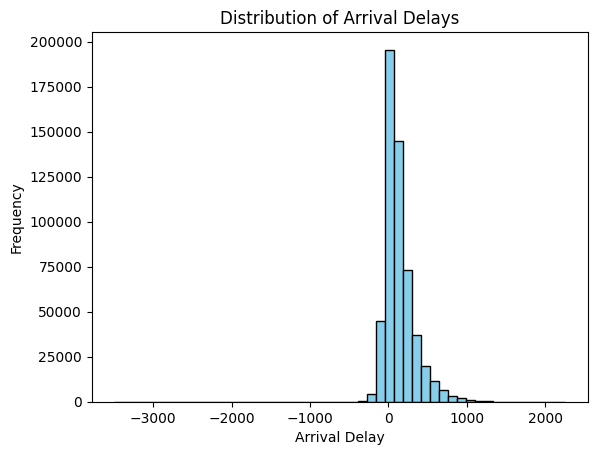

In [11]:
plt.hist(dataset['arrival_delay'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.show()


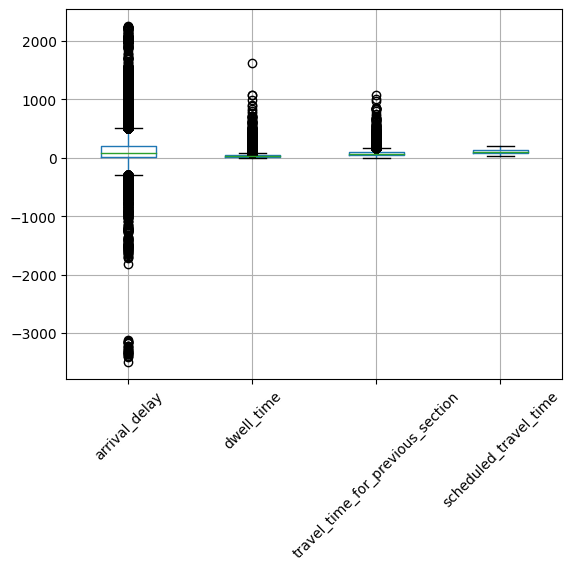

In [3]:
boxplot1 = dataset.boxplot(column=["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time"])
plt.xticks(rotation=45)
plt.show()

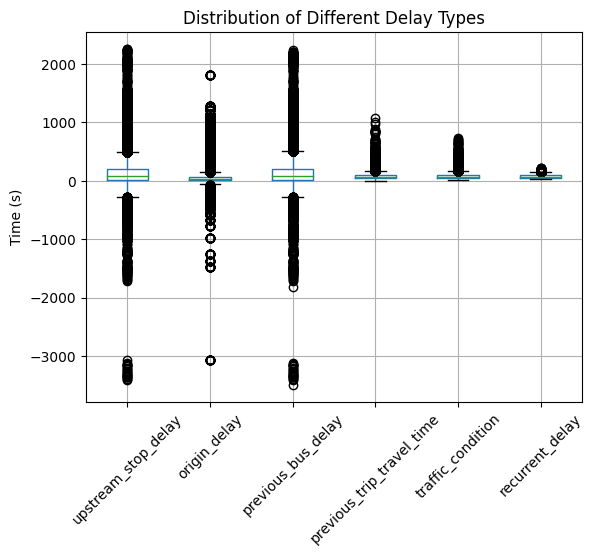

In [5]:
boxplot = dataset.boxplot(column=["upstream_stop_delay", "origin_delay", "previous_bus_delay",
                            "previous_trip_travel_time", "traffic_condition", "recurrent_delay"])
plt.title('Distribution of Different Delay Types')  # Adding a title
plt.ylabel('Time (s)')  # Labeling the y-axis
plt.xticks(rotation=45)
plt.show()

In [ ]:
np.unique(dataset.isna())

array([False])

In [ ]:
correlation_matrix = dataset[["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time","upstream_stop_delay","origin_delay","previous_bus_delay","previous_trip_travel_time","traffic_condition","recurrent_delay"]].corr()

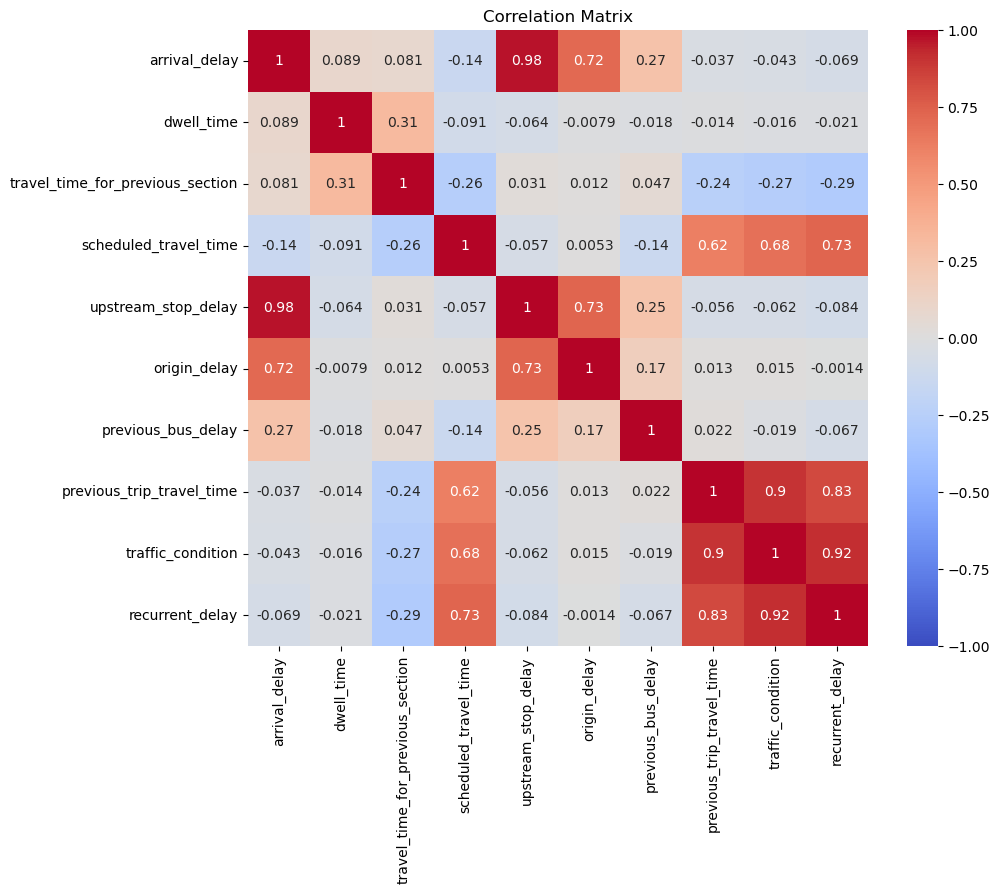

In [ ]:
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [12]:
rp.summary_cat(dataset[["weather", "temperature","day_of_week","time_of_day"]])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


Variable     Outcome   Count  Percent
0       weather      Normal  514971    94.47
1                Light Rain   13338     2.45
2                Light Snow    9720     1.78
3                      Snow    3699     0.68
4                      Rain    3375     0.62
5   temperature      Normal  473877    86.93
6                      Cold   61452    11.27
7                Extra cold    9774     1.79
8   day_of_week     weekday  418149    76.71
9                   weekend  126954    23.29
10  time_of_day          OP  341469    62.64
11                       AP  113751    20.87
12                       MP   89883    16.49

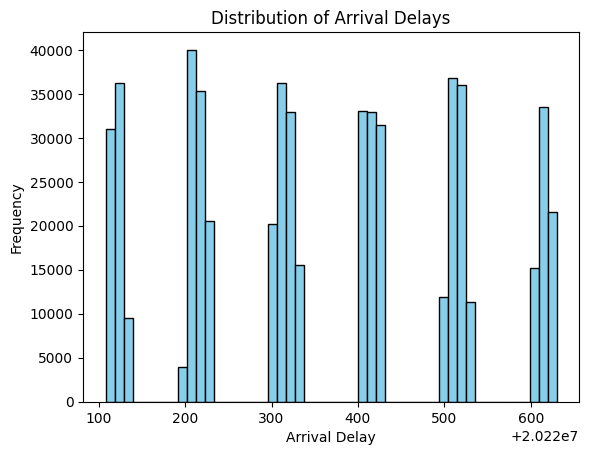

In [14]:
plt.hist(dataset['Calendar_date'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')
plt.show()

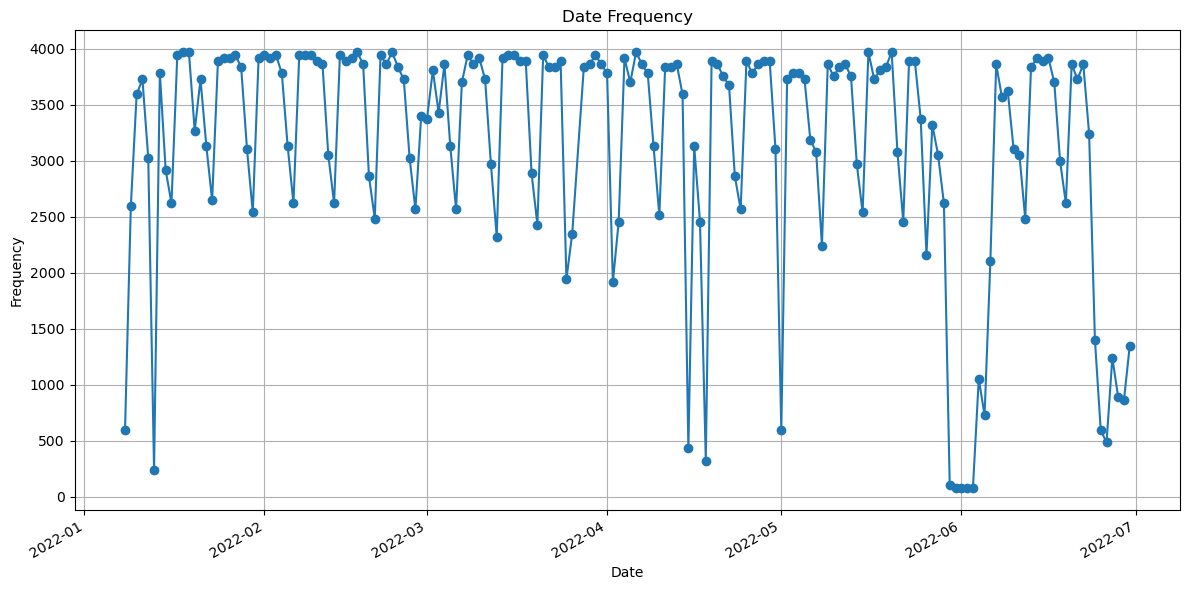

In [ ]:

dates = pd.to_datetime(dataset['Calendar_date'], format='%Y%m%d')

date_frequencies = dates.value_counts().sort_index()

plt.figure(figsize=(12, 6))
date_frequencies.plot(kind='line', linestyle='-', marker='o')
plt.title("Date Frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

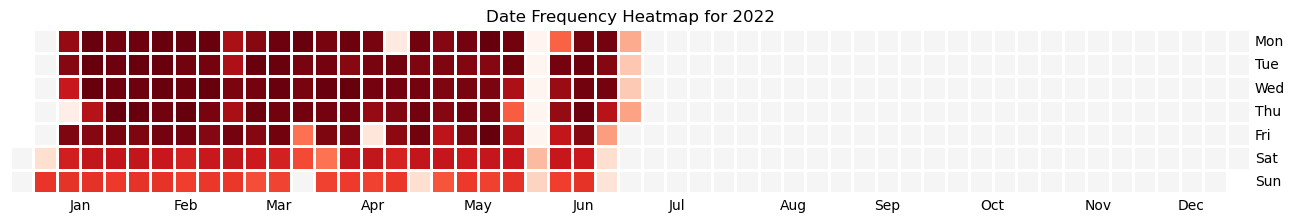

In [ ]:
plt.figure(figsize=(16, 10))
calmap.yearplot(date_frequencies, year=2022)
plt.title("Date Frequency Heatmap for 2022")
plt.show()

In [ ]:
dates

0        2022-01-08
1        2022-01-08
2        2022-01-08
3        2022-01-08
4        2022-01-08
            ...    
545098   2022-06-30
545099   2022-06-30
545100   2022-06-30
545101   2022-06-30
545102   2022-06-30
Name: Calendar_date, Length: 545103, dtype: datetime64[ns]

In [ ]:
dataset[0:5]['scheduled_travel_time'].sum()/60

6.433333333333334

In [ ]:
dataset['scheduled_travel_time'].mean()/60

1.7653067401940552

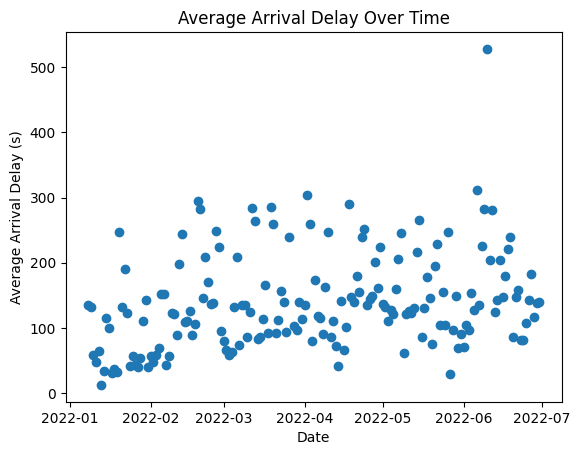

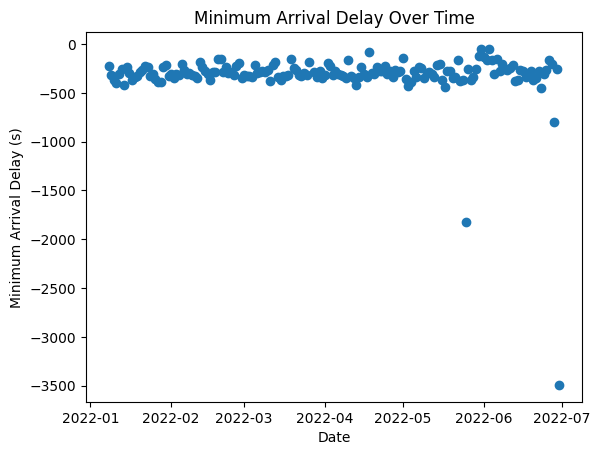

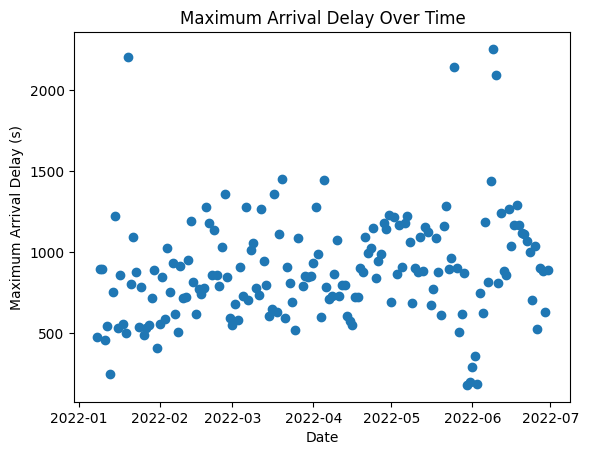

In [47]:
# Convert 'Calendar_date' to datetime format if not already done
dataset['Calendar_date'] = pd.to_datetime(dataset['Calendar_date'], format='%Y%m%d')

# Calculate the mean arrival delay and create a scatter plot
averagedelaydata = dataset.groupby("Calendar_date")['arrival_delay'].mean().reset_index()
plt.scatter(averagedelaydata['Calendar_date'], averagedelaydata['arrival_delay'])
plt.title('Average Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (s)')
plt.show()

# Calculate the minimum arrival delay and create a scatter plot
averagedelaydata = dataset.groupby("Calendar_date")['arrival_delay'].min().reset_index()
plt.scatter(averagedelaydata['Calendar_date'], averagedelaydata['arrival_delay'])
plt.title('Minimum Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Minimum Arrival Delay (s)')
plt.show()

# Calculate the maximum arrival delay and create a scatter plot
averagedelaydata = dataset.groupby("Calendar_date")['arrival_delay'].max().reset_index()
plt.scatter(averagedelaydata['Calendar_date'], averagedelaydata['arrival_delay'])
plt.title('Maximum Arrival Delay Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Arrival Delay (s)')
plt.show()

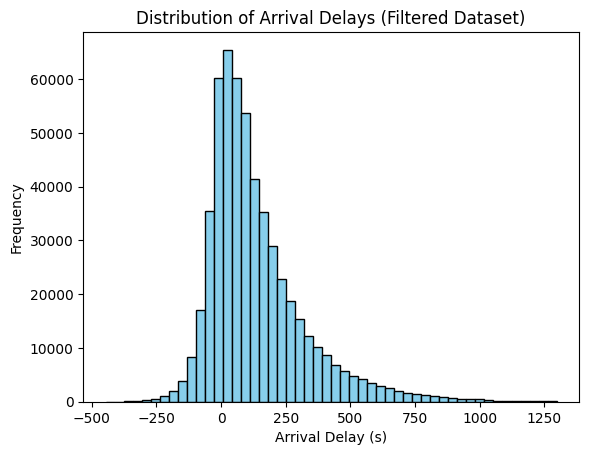

In [51]:
dataset2 = dataset.copy()
dataset2["zscore"] = (dataset.arrival_delay - dataset.arrival_delay.mean())/dataset.arrival_delay.std()
dataset2 = dataset2[(dataset2.zscore>-3)&(dataset2.zscore<6)]
dataset2 = dataset2.drop(columns = ["zscore"])
plt.hist(dataset2["arrival_delay"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays (Filtered Dataset)')
plt.xlabel('Arrival Delay (s)')
plt.ylabel('Frequency')
plt.show()

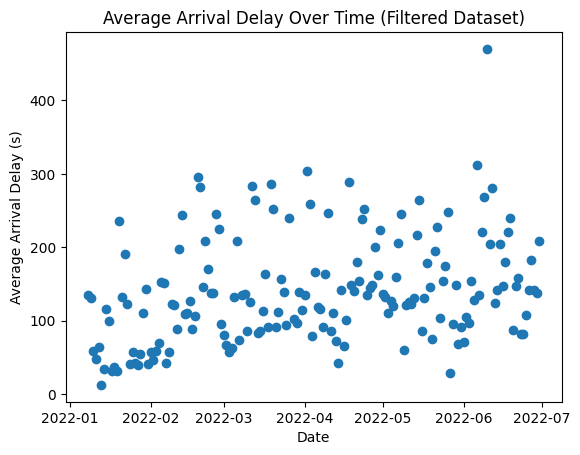

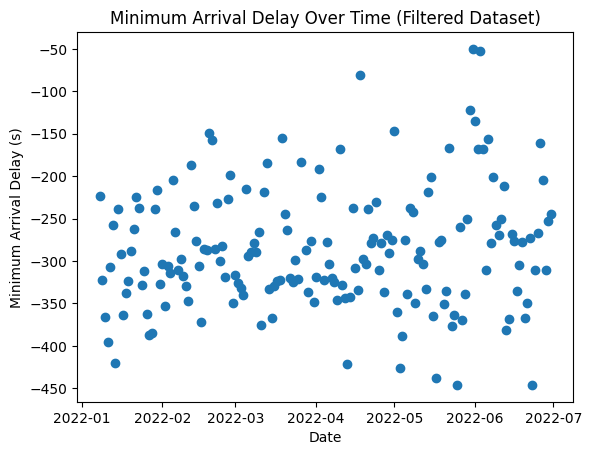

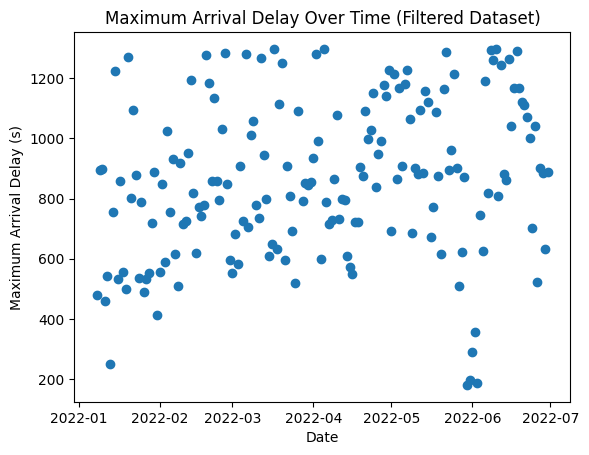

In [52]:
# Calculate the mean arrival delay and create a scatter plot
averagedelaydata = dataset2.groupby("Calendar_date")['arrival_delay'].mean().reset_index()
plt.scatter(averagedelaydata['Calendar_date'], averagedelaydata['arrival_delay'])
plt.title('Average Arrival Delay Over Time (Filtered Dataset)')
plt.xlabel('Date')
plt.ylabel('Average Arrival Delay (s)')
plt.show()

# Calculate the minimum arrival delay and create a scatter plot
averagedelaydata = dataset2.groupby("Calendar_date")['arrival_delay'].min().reset_index()
plt.scatter(averagedelaydata['Calendar_date'], averagedelaydata['arrival_delay'])
plt.title('Minimum Arrival Delay Over Time (Filtered Dataset)')
plt.xlabel('Date')
plt.ylabel('Minimum Arrival Delay (s)')
plt.show()

# Calculate the maximum arrival delay and create a scatter plot
averagedelaydata = dataset2.groupby("Calendar_date")['arrival_delay'].max().reset_index()
plt.scatter(averagedelaydata['Calendar_date'], averagedelaydata['arrival_delay'])
plt.title('Maximum Arrival Delay Over Time (Filtered Dataset)')
plt.xlabel('Date')
plt.ylabel('Maximum Arrival Delay (s)')
plt.show()

In [46]:
import matplotlib.pyplot as plt

# Create a histogram for the "arrival_delay" column of dataset2
plt.hist(dataset2["arrival_delay"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays (Filtered Dataset)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

NameError: ignored

## 1.3 Creation of Training Datasets

### 1.3.1 Creation of Datasets with 1,5,10,15,20 Stop Prediction

In [ ]:
count = 0
delayed5 = pd.DataFrame()
delayed10 = pd.DataFrame()
delayed15 = pd.DataFrame()
delayed20 = pd.DataFrame()
repeating_sequence = list(range(1,28))


for k in set(dataset['Calendar_date']):
  buses = set(dataset[dataset["Calendar_date"]==k]["bus_id"])
  for j in buses:

    separate_dataframes = []
    pullout = dataset[(dataset['bus_id'] == j) & (dataset['Calendar_date'] == k)]

    current_dataframe = pd.DataFrame(columns=['stop_sequence'])

    for index, row in pullout.iterrows():
        current_dataframe = pd.concat([current_dataframe, pd.DataFrame(row).T], ignore_index=True)

        # Check if the last few elements of the current DataFrame match the repeating sequence
        if current_dataframe['stop_sequence'].tolist()[-len(repeating_sequence):] == repeating_sequence:
            separate_dataframes = separate_dataframes + [current_dataframe]
            current_dataframe = pd.DataFrame(columns=['stop_sequence'])

    # Add the last sub-DataFrame to the list
    if not current_dataframe.empty:
        separate_dataframes = separate_dataframes + [current_dataframe]

    for i in range(0,len(separate_dataframes)):
        subframe = separate_dataframes[i]


        pullout5 = subframe.copy()
        pullout5['delayed_delay'] = pullout5['arrival_delay'].shift(-4)
        pullout5 = pullout5.dropna()
        delayed5 = pd.concat((delayed5,pullout5),axis=0)

        pullout10 = subframe.copy()
        pullout10['delayed_delay'] = pullout10['arrival_delay'].shift(-9)
        pullout10 = pullout10.dropna()
        delayed10 = pd.concat((delayed10,pullout10),axis=0)

        pullout15 = subframe.copy()
        pullout15['delayed_delay'] = pullout15['arrival_delay'].shift(-14)
        pullout15 = pullout15.dropna()
        delayed15 = pd.concat((delayed15,pullout15),axis=0)

        pullout20 = subframe.copy()
        pullout20['delayed_delay'] = pullout20['arrival_delay'].shift(-19)
        pullout20 = pullout20.dropna()
        delayed20 = pd.concat((delayed20,pullout20),axis=0)


In [ ]:
delayed5.reset_index(drop=True, inplace=True)
delayed10.reset_index(drop=True, inplace=True)
delayed15.reset_index(drop=True, inplace=True)
delayed20.reset_index(drop=True, inplace=True)

In [3]:
columnnames = dataset.columns
numericcolumns = columnnames[4:14].tolist()
numericcolumns.append("delayed_delay")
factorcolumns = columnnames[18:].tolist()
columnstouse = numericcolumns + factorcolumns

In [9]:
for column in columnstouse:
    delayed5[column] = pd.to_numeric(delayed5[column], errors='coerce')
    delayed10[column] = pd.to_numeric(delayed10[column], errors='coerce')
    delayed15[column] = pd.to_numeric(delayed15[column], errors='coerce')
    delayed20[column] = pd.to_numeric(delayed20[column], errors='coerce')

In [7]:
delayed5.to_csv('delayed5.csv', index=False, encoding='utf-8')
delayed10.to_csv('delayed10.csv', index=False, encoding='utf-8')
delayed15.to_csv('delayed15.csv', index=False, encoding='utf-8')
delayed20.to_csv('delayed20.csv', index=False, encoding='utf-8')

NameError: name 'delayed5' is not defined

In [8]:
#delayed5.to_csv('delayed5.csv', index=False, encoding='utf-8')
#delayed10.to_csv('delayed10.csv', index=False, encoding='utf-8')
#delayed15.to_csv('delayed15.csv', index=False, encoding='utf-8')
#delayed20.to_csv('delayed20.csv', index=False, encoding='utf-8')

delayed5 = pd.read_csv('delayed5.csv')
delayed10 = pd.read_csv('delayed10.csv')
delayed15 = pd.read_csv('delayed15.csv')
delayed20 = pd.read_csv('delayed20.csv')

### 1.3.2 Normalizing the Datasets

Z-Score normalization handles outliers better (many in the dataset and important to detect)

In [ ]:
#scaler = StandardScaler()
#delayed5[numericcolumns] = scaler.fit_transform(delayed5[numericcolumns])
#delayed10[numericcolumns] = scaler.fit_transform(delayed10[numericcolumns])
#delayed15[numericcolumns] = scaler.fit_transform(delayed15[numericcolumns])
#delayed20[numericcolumns] = scaler.fit_transform(delayed20[numericcolumns])

In [10]:
delayed5["zscore"] = (delayed5.arrival_delay - delayed5.arrival_delay.mean())/delayed5.arrival_delay.std()
delayed5 = delayed5[(delayed5.zscore>-3)&(delayed5.zscore<6)]
delayed5 = delayed5.drop(columns = ["zscore"])

delayed10["zscore"] = (delayed10.arrival_delay - delayed10.arrival_delay.mean())/delayed10.arrival_delay.std()
delayed10 = delayed10[(delayed10.zscore>-3)&(delayed10.zscore<6)]
delayed10 = delayed10.drop(columns = ["zscore"])

delayed15["zscore"] = (delayed15.arrival_delay - delayed15.arrival_delay.mean())/delayed15.arrival_delay.std()
delayed15 = delayed15[(delayed15.zscore>-3)&(delayed15.zscore<6)]
delayed15 = delayed15.drop(columns = ["zscore"])

delayed20["zscore"] = (delayed20.arrival_delay - delayed20.arrival_delay.mean())/delayed20.arrival_delay.std()
delayed20 = delayed20[(delayed20.zscore>-3)&(delayed20.zscore<6)]
delayed20 = delayed20.drop(columns = ["zscore"])

In [11]:
delayed5 = delayed5[columnstouse]
delayed10 = delayed10[columnstouse]
delayed15 = delayed15[columnstouse]
delayed20 = delayed20[columnstouse]

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
delayed5.iloc[:1000,:]
#first_50_columns = delayed5.iloc[:50, :]
#first_50_columns
#Is the rows in the right order? if yes then the delayed delay is wrong

arrival_delay  dwell_time  travel_time_for_previous_section  \
0               -1           0                                 0   
1               23          62                               125   
2               32          24                                37   
3               69          32                                54   
4              124          56                               161   
5              177          27                               103   
6              181          18                                71   
7              174          20                                81   
8              223          86                                89   
9              260          31                                39   
10             248          22                               141   
11             199          24                               112   
12             300          85                                50   
13             363          66                               111   
14             403          67                               136   
15             436          21                                60   
16             444          61                               171   
17             488          43                                55   
18             466          29                               102   
19             471          15                                31   
20             457          45                               119   
21             449          24                                49   
22             457          30                                49   
23             -61           0                                 0   
24              50         157                               107   
25              26          24                                44   
26             -25          31                                34   
27             -12          44                               106   
28              -6          28                                90   
29             -29          27                                30   
30             -12          32                                62   
31             -22          32                               120   
32             -10          29                                34   
33              54          75                               118   
34             -17          21                               135   
35              55          62                                31   
36             186          73                               105   
37             245          99                               197   
38             207          30                                47   
39             216          43                                91   
40             267          51                                74   
41             250          35                               101   
42             219          17                                30   
43             196          37                                81   
44             178          17                                48   
45             175          13                                46   
46              61           0                                 0   
47              92          57                               179   
48              89          28                                49   
49             124          39                                38   
50             160          37                               152   
51             202          33                               120   
52             200          21                                61   
53             176          18                                89   
54             155          24                                93   
55             169          38                                31   
56             106          26                               111   
57              49          30                               

In [12]:
delayed5.dtypes

arrival_delay                          int64
dwell_time                             int64
travel_time_for_previous_section       int64
scheduled_travel_time                  int64
upstream_stop_delay                    int64
origin_delay                           int64
previous_bus_delay                     int64
previous_trip_travel_time              int64
traffic_condition                    float64
recurrent_delay                      float64
delayed_delay                          int64
factor(weather)Light_Rain              int64
factor(weather)Light_Snow              int64
factor(weather)Normal                  int64
factor(weather)Rain                    int64
factor(weather)Snow                    int64
factor(temperature)Cold                int64
factor(temperature)Extra_cold          int64
factor(temperature)Normal              int64
factor(day_of_week)weekday             int64
factor(day_of_week)weekend             int64
factor(time_of_day)Afternoon_peak      int64
factor(tim

### 1.3.3 Splitting the Datasets into Training and Test 80/20%

In [13]:
Y5 = delayed5["delayed_delay"]
X5 = delayed5.drop(columns=["delayed_delay","arrival_delay"])

X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=42)

Y10 = delayed10["delayed_delay"]
X10 = delayed10.drop(columns=["delayed_delay","arrival_delay"])

X10_train, X10_test, Y10_train, Y10_test = train_test_split(X10, Y10, test_size=0.2, random_state=42)

Y15 = delayed15["delayed_delay"]
X15 = delayed15.drop(columns=["delayed_delay","arrival_delay"])

X15_train, X15_test, Y15_train, Y15_test = train_test_split(X15, Y15, test_size=0.2, random_state=42)

Y20 = delayed20["delayed_delay"]
X20 = delayed20.drop(columns=["delayed_delay","arrival_delay"])

X20_train, X20_test, Y20_train, Y20_test = train_test_split(X20, Y20, test_size=0.2, random_state=42)

# 2. Model Creation

## 2.1 Model Training

### 2.1.0 Model Training Module 2 - Regression Models

In [14]:
#Test Sample
X5_train_SAMPLE =  X5_train
X5_test_SAMPLE =   X5_test
X10_train_SAMPLE = X10_train
X10_test_SAMPLE =  X10_test
X15_train_SAMPLE = X15_train
X15_test_SAMPLE =  X15_test
X20_train_SAMPLE = X20_train
X20_test_SAMPLE =  X20_test

Y5_train_SAMPLE =  Y5_train
Y5_test_SAMPLE =   Y5_test
Y10_train_SAMPLE = Y10_train
Y10_test_SAMPLE =  Y10_test
Y15_train_SAMPLE = Y15_train
Y15_test_SAMPLE =  Y15_test
Y20_train_SAMPLE = Y20_train
Y20_test_SAMPLE =  Y20_test

Y5_SAMPLE =  Y5
X5_SAMPLE =  X5
Y10_SAMPLE = Y10
X10_SAMPLE = X10
Y15_SAMPLE = Y15
X15_SAMPLE = X15
Y20_SAMPLE = Y20
X20_SAMPLE = X20

###Linear Regression

Mean Absolute Error: 53.954373170447376
Mean Squared Error: 5022.367081684975
R-squared: 0.8632295732487341


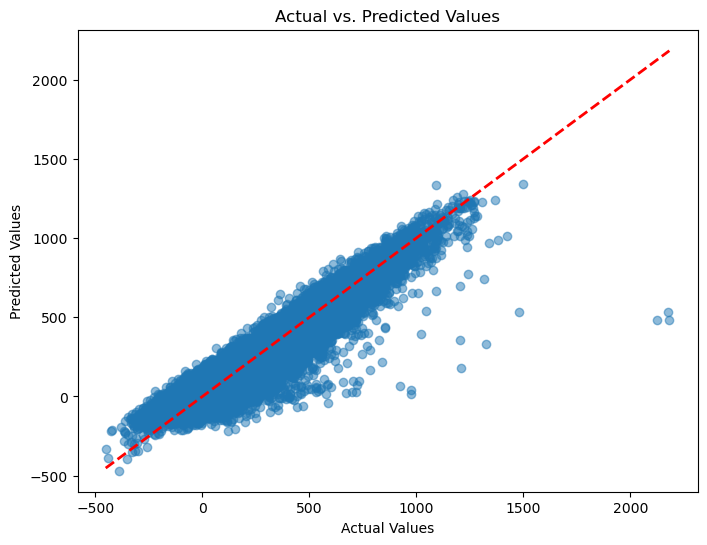

Mean Absolute Error: 82.92296302251651
Mean Squared Error: 11850.76875058035
R-squared: 0.7046659676627721


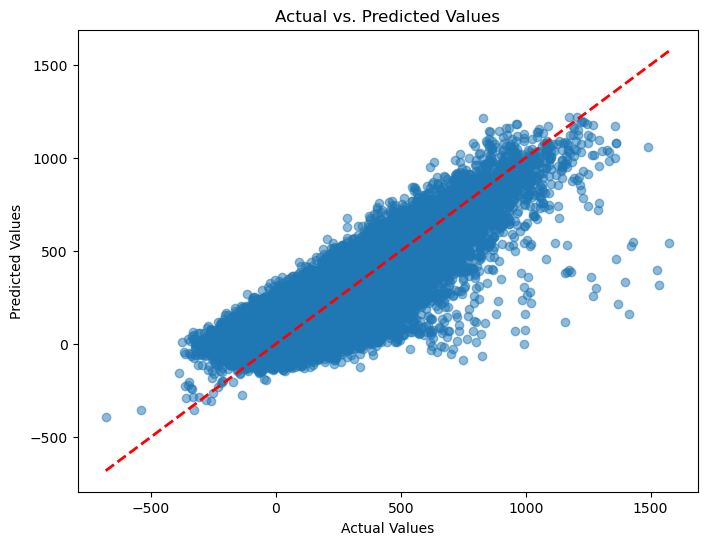

Mean Absolute Error: 102.03889322453115
Mean Squared Error: 17759.03846948816
R-squared: 0.5980794245436697


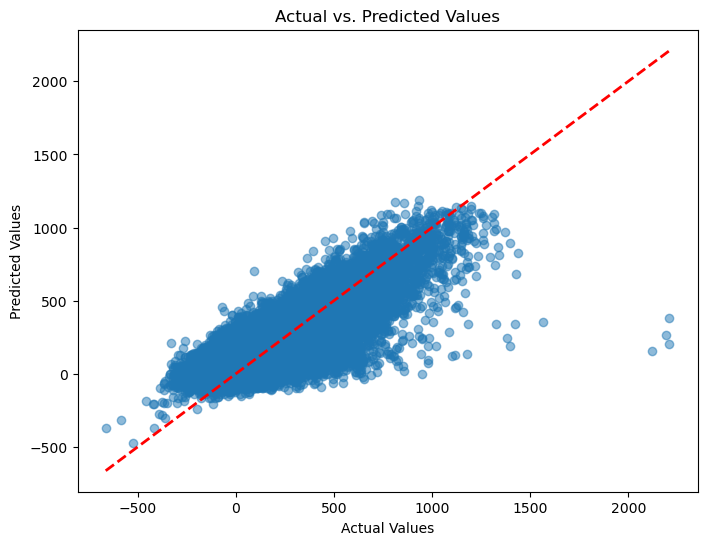

Mean Absolute Error: 115.36025779054089
Mean Squared Error: 22561.298357999298
R-squared: 0.5142983157585654


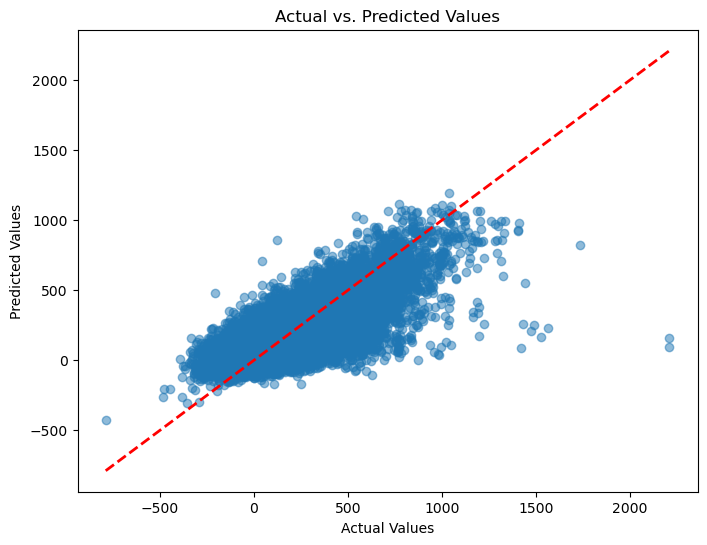

In [ ]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
  # Create variable names based on the data size
  X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
  X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
  Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
  Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
  X_SAMPLE = globals()[f"X{size}_SAMPLE"]
  Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

  # Create a Linear Regression model
  model = LinearRegression()

  # Fit the model to the training data
  model.fit(X_train_SAMPLE, Y_train_SAMPLE)
  y_pred = model.predict(X_test_SAMPLE)

  mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
  mse = mean_squared_error(Y_test_SAMPLE, y_pred)
  r2 = r2_score(Y_test_SAMPLE, y_pred)

  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # y_test contains the actual target values for the test dataset
  # y_pred contains the predicted values for the test dataset

  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

###SVR Regression

In [ ]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
  # Create variable names based on the data size
  X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
  X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
  Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
  Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
  X_SAMPLE = globals()[f"X{size}_SAMPLE"]
  Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

  # Define a parameter grid for hyperparameter tuning
  param_grid = {
      'kernel': ['linear'],
      'C': [0.1,1],
      'epsilon': [10]
  }

  # Create the GridSearchCV object
  grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

  # Fit the grid search to the scaled training data
  grid_search.fit(X_train_SAMPLE, Y_train_SAMPLE)

  # Get the best parameters
  best_params = grid_search.best_params_
  print("Best Parameters:", best_params)

  # Create an SVR model with the best parameters from the grid search
  best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

  # Perform cross-validation on the entire dataset
  cv_scores = cross_val_score(best_svr, X_SAMPLE , Y_SAMPLE, cv=5, verbose=2).mean()
  print(cv_scores)

  best_svr.fit(X_train_SAMPLE, Y_train_SAMPLE)

  y_pred = best_svr.predict(X_test_SAMPLE)
  mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
  mse = mean_squared_error(Y_test_SAMPLE, y_pred)
  r2 = r2_score(Y_test_SAMPLE, y_pred)
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")

  # y_test contains the actual target values for the test dataset
  # y_pred contains the predicted values for the test dataset

  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

Fitting 5 folds for each of 2 candidates, totalling 10 fits


###xGB Regression

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, l

[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.5s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.5s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.5s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.5s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.5s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.7s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.7s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.7s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.8s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.7s

[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.7s

[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   1.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   1.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   1.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.9s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.2s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.3s
[CV] END gamma=

[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.5s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.5s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   1.0s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   1.0s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.9s
[CV] END gamma=100, l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished


Cross-Validation Score for Data Size 5: 0.8989521558930977
Mean Absolute Error for Data Size 5: 44.38250806718143
Mean Squared Error for Data Size 5: 3604.6857376327985
R-squared for Data Size 5: 0.9018362460127395


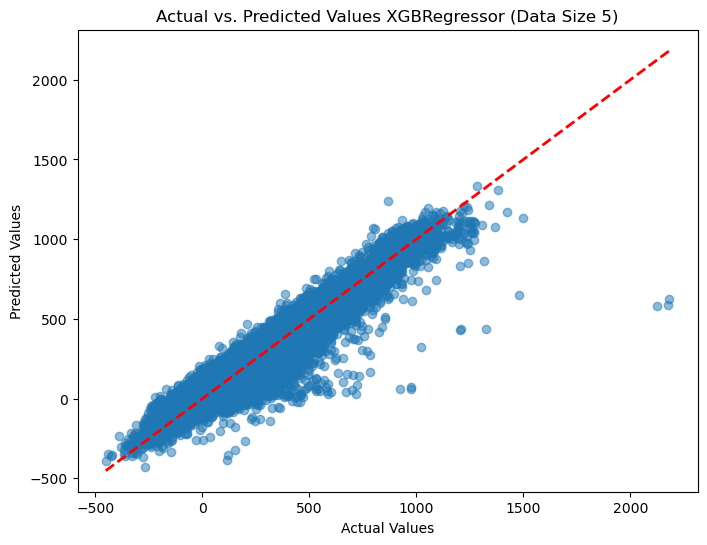

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, l

[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.5s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.6s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.6s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.6s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.6s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.6s

[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.5s

[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END gamma=

[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END gamma=100, l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s finished


Cross-Validation Score for Data Size 10: 0.7825517341503249
Mean Absolute Error for Data Size 10: 68.83889835171189
Mean Squared Error for Data Size 10: 8307.069736828445
R-squared for Data Size 10: 0.7929787970789697


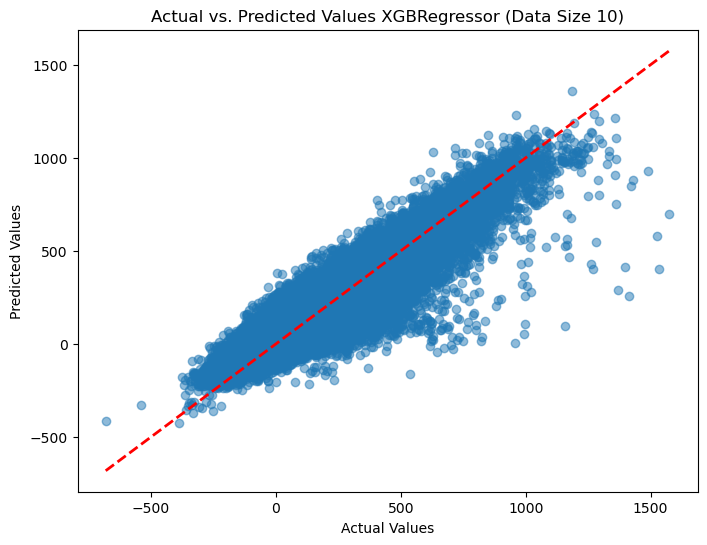

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, l

[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=200; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.4s

[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.4s

[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.5s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.5s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.5s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.5s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=

[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.6s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.6s
[CV] END gamma=100, l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished


Cross-Validation Score for Data Size 15: 0.6689358182629654
Mean Absolute Error for Data Size 15: 88.65703756497382
Mean Squared Error for Data Size 15: 13550.850398779367
R-squared for Data Size 15: 0.6933186670236986


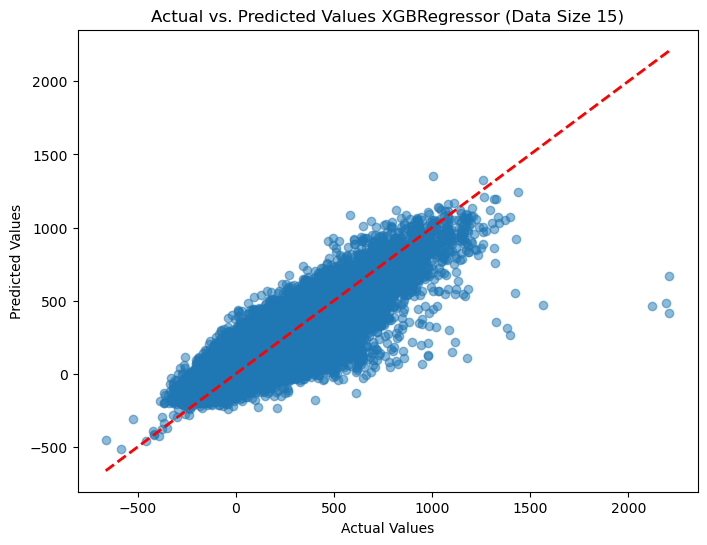

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.01, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, l

[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=2, n_estimators=400; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s


[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END gamma=0.005, learning_rate=0.2, max_depth=3, n_estimators=300; total time=   0.2s

[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.3s
[CV] END gamma=100, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.3s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=100, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END gamma=

[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.3s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.4s
[CV] END gamma=100, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.4s
[CV] END gamma=100, learning_rate=0.2, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END gamma=100, le

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


Cross-Validation Score for Data Size 20: 0.5700392891127933
Mean Absolute Error for Data Size 20: 103.65569433139328
Mean Squared Error for Data Size 20: 18280.726671404904
R-squared for Data Size 20: 0.6064508525808952


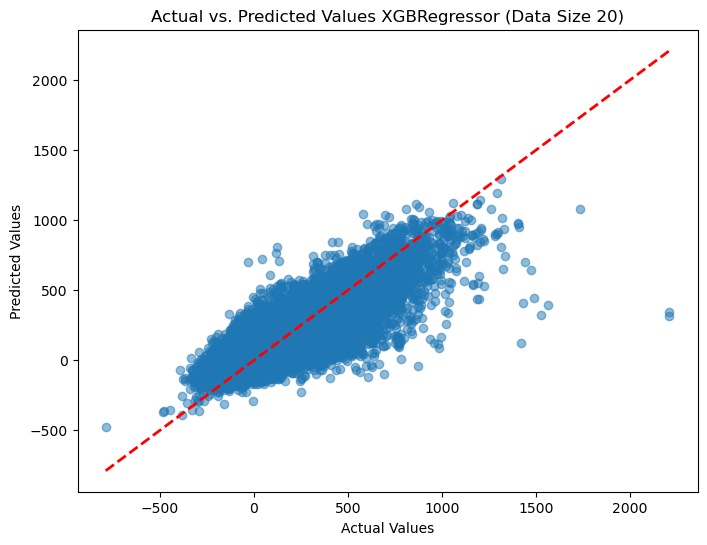

In [ ]:

# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

    # Define hyperparameter search space and model
    params = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200, 300,400],
        'max_depth': [2,3, 4],
        'gamma': [0.005, 100]
    }

    model = XGBRegressor()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, params, cv=5, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for Data Size {size}: {best_params}")
    best_score = grid_search.best_score_
    model = grid_search.best_estimator_

    # Cross-validation of the best model
    cv_scores = cross_val_score(model, X_SAMPLE, Y_SAMPLE, cv=5, verbose=1).mean()
    print(f"Cross-Validation Score for Data Size {size}: {cv_scores}")

    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_SAMPLE)
    mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
    mse = mean_squared_error(Y_test_SAMPLE, y_pred)
    r2 = r2_score(Y_test_SAMPLE, y_pred)
    print(f"Mean Absolute Error for Data Size {size}: {mae}")
    print(f"Mean Squared Error for Data Size {size}: {mse}")
    print(f"R-squared for Data Size {size}: {r2}")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values XGBRegressor (Data Size {size})")
    plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
    plt.show()

###KNN Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  13.8s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  13.7s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  13.5s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  13.9s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  13.7s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  13.8s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  13.6s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  13.7s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  13.7s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  13.6s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   5.3s
[CV] END ................n_neighbors=9, p=2, wei

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


Cross-Validation Score for Data Size 5: 0.8698289214971439
Mean Absolute Error for Data Size 5: 50.60470522334045
Mean Squared Error for Data Size 5: 4581.610672669089
R-squared for Data Size 5: 0.8752323681806875


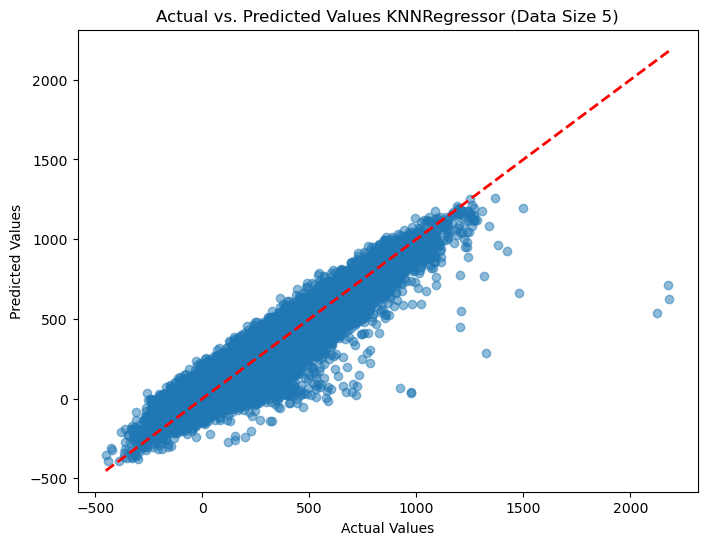

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   8.4s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   8.5s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   8.4s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   8.4s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   8.5s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   8.3s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   8.4s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   8.4s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   8.4s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   8.4s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   3.3s
[CV] END ................n_neighbors=9, p=2, wei

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


Cross-Validation Score for Data Size 10: 0.7286109013155716
Mean Absolute Error for Data Size 10: 77.7197586904925
Mean Squared Error for Data Size 10: 10496.847503764116
R-squared for Data Size 10: 0.7384071560788994


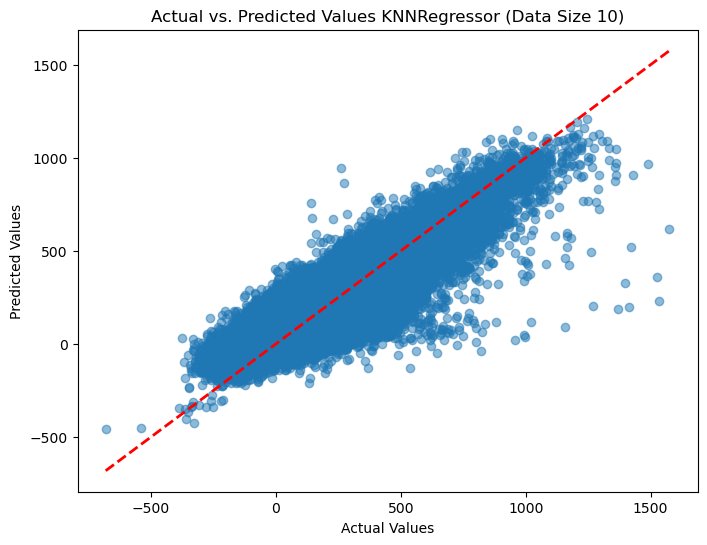

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   4.5s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   4.4s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   4.4s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   4.5s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   4.5s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   4.6s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   4.4s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   4.6s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   4.4s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   4.4s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   1.9s
[CV] END ................n_neighbors=9, p=2, wei

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.9s finished


Cross-Validation Score for Data Size 15: 0.6104295241731933
Mean Absolute Error for Data Size 15: 97.54518405400461
Mean Squared Error for Data Size 15: 16399.54861501915
R-squared for Data Size 15: 0.6288472471132311


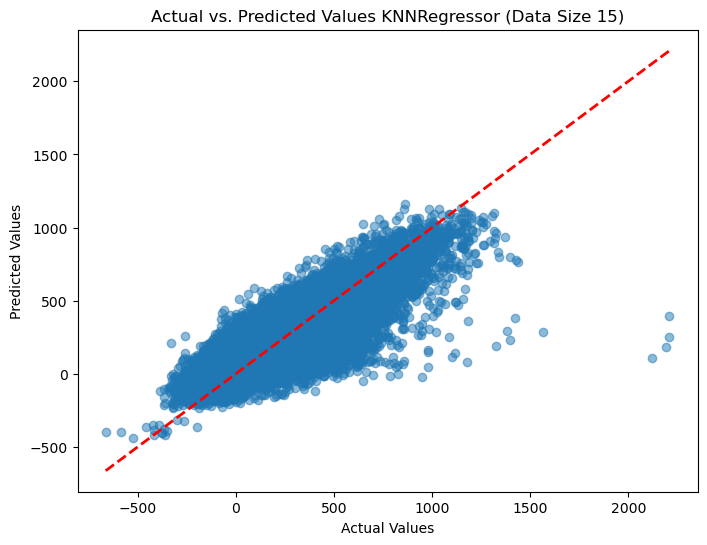

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   1.7s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   1.7s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   1.7s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   1.8s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=   1.7s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   1.8s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   1.7s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   1.7s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   1.8s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=   1.7s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   0.7s
[CV] END ................n_neighbors=9, p=2, wei

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.9s finished


Cross-Validation Score for Data Size 20: 0.5046023046580494
Mean Absolute Error for Data Size 20: 113.6000820913737
Mean Squared Error for Data Size 20: 22012.948885407553
R-squared for Data Size 20: 0.5261032331070514


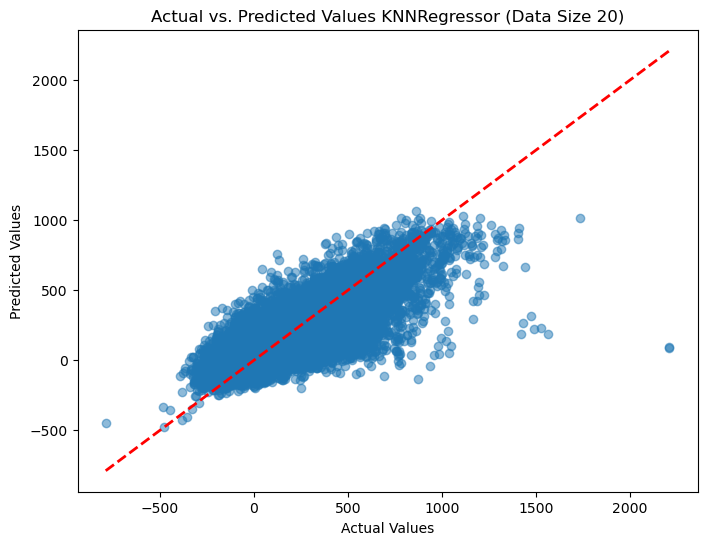

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]

    # Define hyperparameter search space and model
    params = {
        'n_neighbors': [9, 10, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1: Manhattan, 2: Euclidean
    }

    model = KNeighborsRegressor()

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, params, cv=5, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for Data Size {size}: {best_params}")
    best_score = grid_search.best_score_
    model = grid_search.best_estimator_

    # Cross-validation of the best model
    cv_scores = cross_val_score(model, X_SAMPLE, Y_SAMPLE, cv=5, verbose=1).mean()
    print(f"Cross-Validation Score for Data Size {size}: {cv_scores}")

    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_SAMPLE)
    mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
    mse = mean_squared_error(Y_test_SAMPLE, y_pred)
    r2 = r2_score(Y_test_SAMPLE, y_pred)
    print(f"Mean Absolute Error for Data Size {size}: {mae}")
    print(f"Mean Squared Error for Data Size {size}: {mse}")
    print(f"R-squared for Data Size {size}: {r2}")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs. Predicted Values KNNRegressor (Data Size {size})")
    plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
    plt.show()


### 2.1.3  Model Training Module 6 - Do we need to make Reduction?

### 2.1.4 Model Training Module 7 - Nural Network Models

In [ ]:
#-------------------------------------------------network construction------------------------------------------------------------------

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Layers", "Dropout Rate", "Learning Rate", "MAE"])

# Search parameters
layer_configs = [[32, 64], [64, 128, 64], [128, 256, 128, 64]]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0001]

for config in layer_configs:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:

            model = Sequential()

            # Add layers from config
            model.add(Dense(config[0], activation='relu', input_dim=22))
            for units in config[1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(dropout_rate))

            model.add(Dense(1))

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

            # Callbacks
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

            # Train without verbose and without ModelCheckpoint for simplicity
            hist = model.fit(X5_train, Y5_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

            val_mae = min(hist.history['val_mae'])
            newrow = new_row = pd.DataFrame({
                "Layers": [str(config)],
                "Dropout Rate": [dropout_rate],
                "Learning Rate": [learning_rate],
                "MAE": [val_mae]
            })
            # Append results to the DataFrame
            results_df = pd.concat([results_df,newrow], ignore_index=True)
            print(layer_configs)

# Print the results in a tabular form
print(results_df)

# To find the best configuration, sort the DataFrame based on MAE
best_row = results_df.sort_values(by="MAE").iloc[0]
print("\nBest Configuration:")
print(best_row)

[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
                 Layers  Dropout Rate  Learning Rate        MAE
0              [32, 64]           0.2         0.0010  48.048080
1              [32, 64]   

2899/2899 [==============================] - 1s 463us/step
Mean Absolute Error: 49.69245051790137
Mean Squared Error: 4486.32836971886
R-squared: 0.8778271210182229


C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


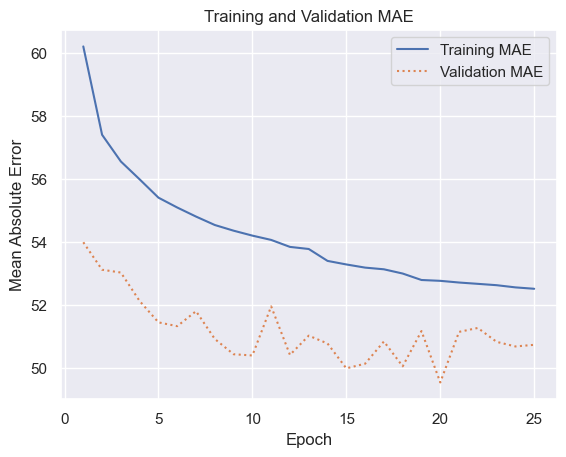

In [16]:
model = Sequential()
config = [128, 256, 128, 64]
dropout_rate = .2
learning_rate=0.0001
# Add layers from config
model.add(Dense(config[0], activation='relu', input_dim=22))
for units in config[1:]:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Train without verbose and without ModelCheckpoint for simplicity
hist = model.fit(X5_train, Y5_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X5_test)
model.save("NN5.h5")
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(Y5_test, y_pred)
mse = mean_squared_error(Y5_test, y_pred)
r2 = r2_score(Y5_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


0.001

In [ ]:
#-------------------------------------------------network construction------------------------------------------------------------------

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Layers", "Dropout Rate", "Learning Rate", "MAE"])

# Search parameters
layer_configs = [[32, 64], [64, 128, 64], [128, 256, 128, 64]]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0001]

for config in layer_configs:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:

            model = Sequential()

            # Add layers from config
            model.add(Dense(config[0], activation='relu', input_dim=22))
            for units in config[1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(dropout_rate))

            model.add(Dense(1))

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

            # Callbacks
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

            # Train without verbose and without ModelCheckpoint for simplicity
            hist = model.fit(X10_train, Y10_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

            val_mae = min(hist.history['val_mae'])
            newrow = new_row = pd.DataFrame({
                "Layers": [str(config)],
                "Dropout Rate": [dropout_rate],
                "Learning Rate": [learning_rate],
                "MAE": [val_mae]
            })
            # Append results to the DataFrame
            results_df = pd.concat([results_df,newrow], ignore_index=True)
            print(layer_configs)

# Print the results in a tabular form
print(results_df)

# To find the best configuration, sort the DataFrame based on MAE
best_row = results_df.sort_values(by="MAE").iloc[0]
print("\nBest Configuration:")
print(best_row)

[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
                 Layers  Dropout Rate  Learning Rate        MAE
0              [32, 64]           0.2         0.0010  71.858543
1              [32, 64]   

2269/2269 [==============================] - 1s 479us/step
Mean Absolute Error: 72.24818805753392
Mean Squared Error: 9319.63155156995
R-squared: 0.7677446565744843


C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


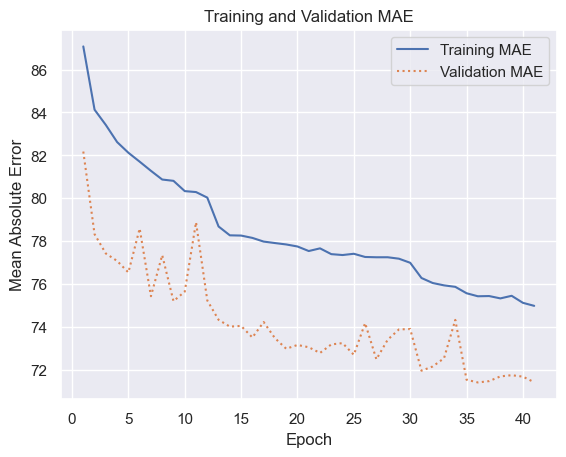

In [17]:
model = Sequential()
config = [128, 256, 128, 64]
dropout_rate = 0.3
learning_rate=0.001
# Add layers from config
model.add(Dense(config[0], activation='relu', input_dim=22))
for units in config[1:]:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Train without verbose and without ModelCheckpoint for simplicity
hist = model.fit(X10_train, Y10_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X10_test)

model.save("NN10.h5")
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(Y10_test, y_pred)
mse = mean_squared_error(Y10_test, y_pred)
r2 = r2_score(Y10_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
#-------------------------------------------------network construction------------------------------------------------------------------

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Layers", "Dropout Rate", "Learning Rate", "MAE"])

# Search parameters
layer_configs = [[32, 64], [64, 128, 64], [128, 256, 128, 64]]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0001]

for config in layer_configs:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:

            model = Sequential()

            # Add layers from config
            model.add(Dense(config[0], activation='relu', input_dim=22))
            for units in config[1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(dropout_rate))

            model.add(Dense(1))

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

            # Callbacks
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

            # Train without verbose and without ModelCheckpoint for simplicity
            hist = model.fit(X15_train, Y15_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

            val_mae = min(hist.history['val_mae'])
            newrow = new_row = pd.DataFrame({
                "Layers": [str(config)],
                "Dropout Rate": [dropout_rate],
                "Learning Rate": [learning_rate],
                "MAE": [val_mae]
            })
            # Append results to the DataFrame
            results_df = pd.concat([results_df,newrow], ignore_index=True)
            print(layer_configs)

# Print the results in a tabular form
print(results_df)

# To find the best configuration, sort the DataFrame based on MAE
best_row = results_df.sort_values(by="MAE").iloc[0]
print("\nBest Configuration:")
print(best_row)

[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
                 Layers  Dropout Rate  Learning Rate        MAE
0              [32, 64]           0.2         0.0010  91.755798
1              [32, 64]   

1639/1639 [==============================] - 1s 496us/step
Mean Absolute Error: 91.75671340595623
Mean Squared Error: 15011.483967907188
R-squared: 0.6602617711988872


C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


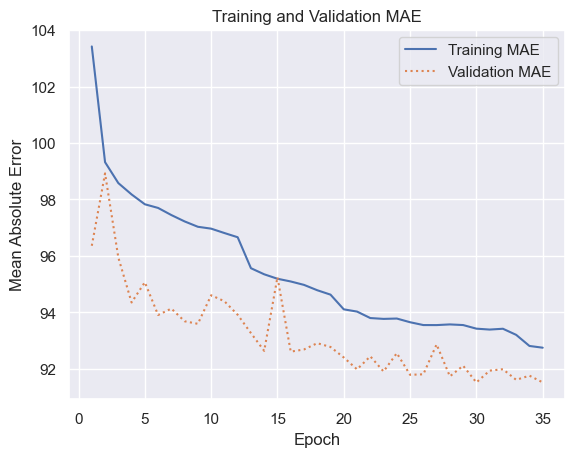

In [18]:
model = Sequential()
config = [128, 256, 128, 64]
dropout_rate = 0.2
learning_rate= 0.001
# Add layers from config
model.add(Dense(config[0], activation='relu', input_dim=22))
for units in config[1:]:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Train without verbose and without ModelCheckpoint for simplicity
hist = model.fit(X15_train, Y15_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X15_test)
model.save("NN15.h5")
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(Y15_test, y_pred)
mse = mean_squared_error(Y15_test, y_pred)
r2 = r2_score(Y15_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
#-------------------------------------------------network construction------------------------------------------------------------------

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Layers", "Dropout Rate", "Learning Rate", "MAE"])

# Search parameters
layer_configs = [[32, 64], [64, 128, 64], [128, 256, 128, 64]]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0001]

for config in layer_configs:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:

            model = Sequential()

            # Add layers from config
            model.add(Dense(config[0], activation='relu', input_dim=22))
            for units in config[1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(dropout_rate))

            model.add(Dense(1))

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

            # Callbacks
            early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

            # Train without verbose and without ModelCheckpoint for simplicity
            hist = model.fit(X20_train, Y20_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

            val_mae = min(hist.history['val_mae'])
            newrow = new_row = pd.DataFrame({
                "Layers": [str(config)],
                "Dropout Rate": [dropout_rate],
                "Learning Rate": [learning_rate],
                "MAE": [val_mae]
            })
            # Append results to the DataFrame
            results_df = pd.concat([results_df,newrow], ignore_index=True)
            print(layer_configs)

# Print the results in a tabular form
print(results_df)

# To find the best configuration, sort the DataFrame based on MAE
best_row = results_df.sort_values(by="MAE").iloc[0]
print("\nBest Configuration:")
print(best_row)

[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
[[32, 64], [64, 128, 64], [128, 256, 128, 64]]
                 Layers  Dropout Rate  Learning Rate         MAE
0              [32, 64]           0.2         0.0010  108.929420
1              [32, 64] 

1008/1008 [==============================] - 0s 437us/step
Mean Absolute Error: 107.53531813174297
Mean Squared Error: 20348.319536825722
R-squared: 0.5619395252128758


C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


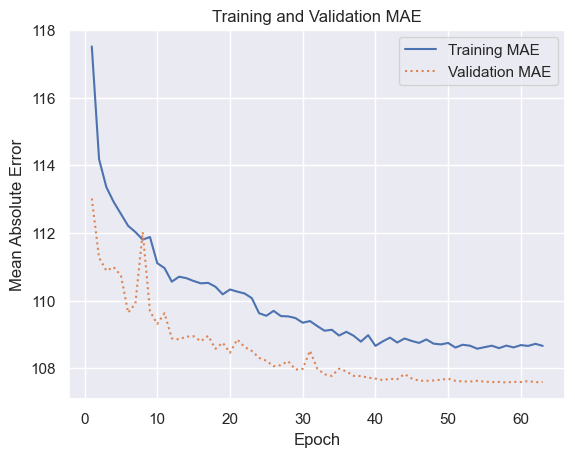

In [19]:
model = Sequential()
config = [64, 128, 64]
dropout_rate =  0.2
learning_rate=0.001
# Add layers from config
model.add(Dense(config[0], activation='relu', input_dim=22))
for units in config[1:]:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))

model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Train without verbose and without ModelCheckpoint for simplicity
hist = model.fit(X20_train, Y20_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr], verbose=0)

sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X20_test)
model.save("NN20.h5")
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(Y20_test, y_pred)
mse = mean_squared_error(Y20_test, y_pred)
r2 = r2_score(Y20_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

## 2.2 Model Evaluation

What type of model is the best performer?

######### 5:5 ##########
Mean Absolute Error for 5/5: 44.38250806718143
Mean Squared Error for 5/5: 3604.6857376327985
R-squared for 5/5: 0.9018362460127395


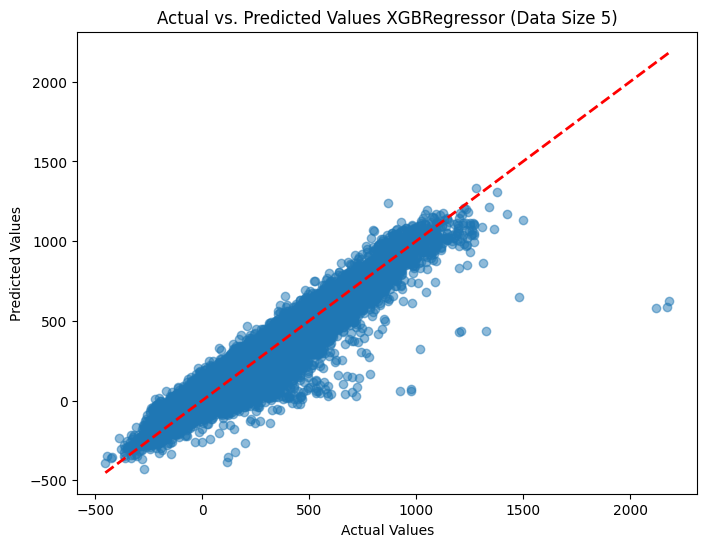

######### 5:10 ##########
Mean Absolute Error for 5/10: 81.02228946066998
Mean Squared Error for 5/10: 11266.431867631833
R-squared for 5/10: 0.7192282776290434


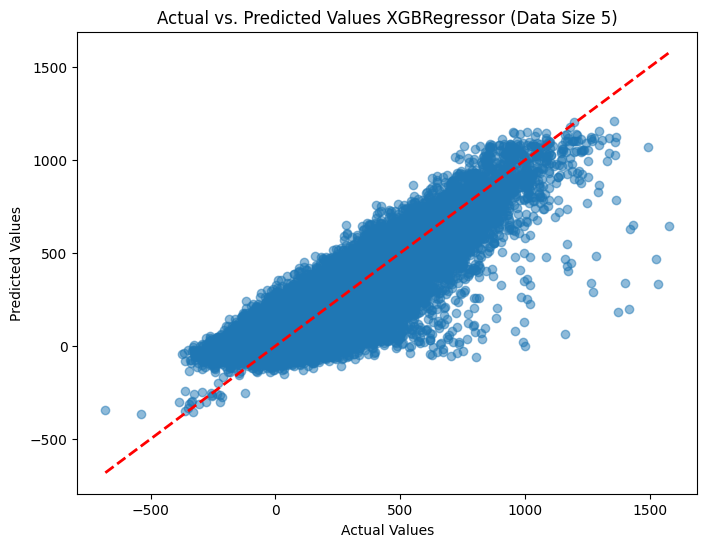

######### 5:15 ##########
Mean Absolute Error for 5/15: 102.6414072084665
Mean Squared Error for 5/15: 18475.19852860932
R-squared for 5/15: 0.5818713700605764


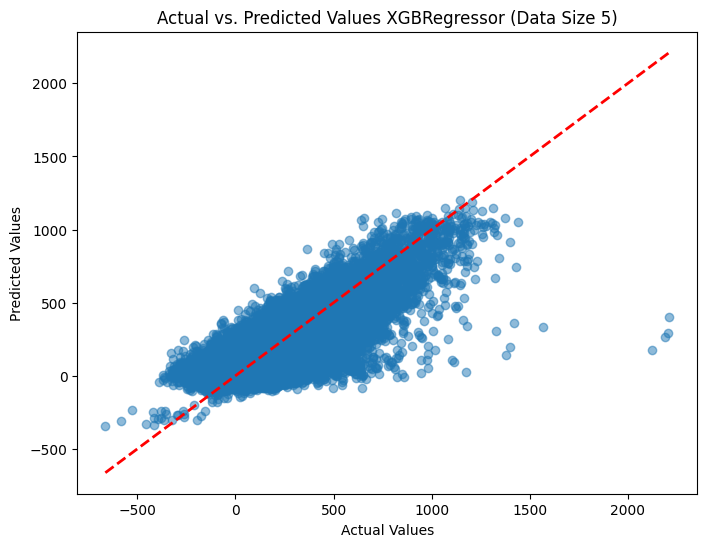

######### 5:20 ##########
Mean Absolute Error for 5/20: 112.26162692360226
Mean Squared Error for 5/20: 22107.886415252247
R-squared for 5/20: 0.5240594093247672


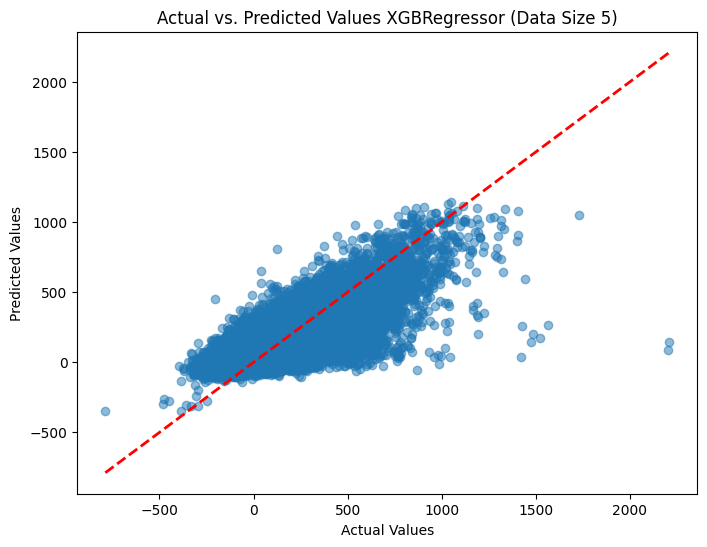

######### 10:5 ##########
Mean Absolute Error for 10/5: 66.15723181311512
Mean Squared Error for 10/5: 7074.644748449362
R-squared for 10/5: 0.8073414058308146


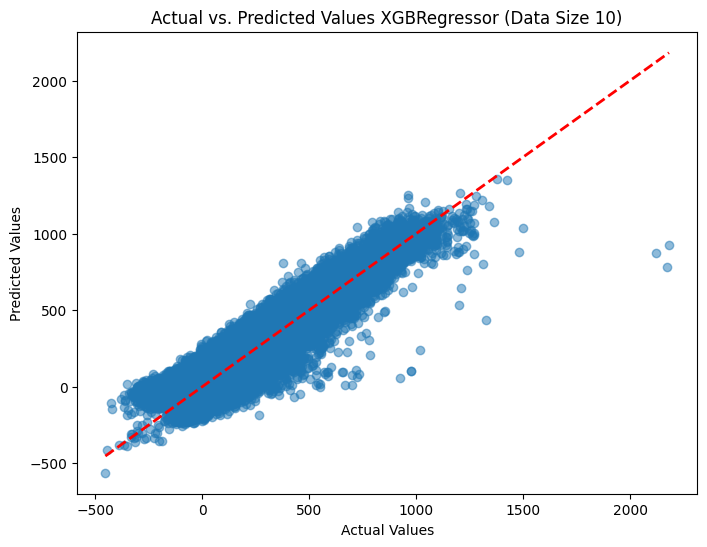

######### 10:10 ##########
Mean Absolute Error for 10/10: 68.83889835171189
Mean Squared Error for 10/10: 8307.069736828445
R-squared for 10/10: 0.7929787970789697


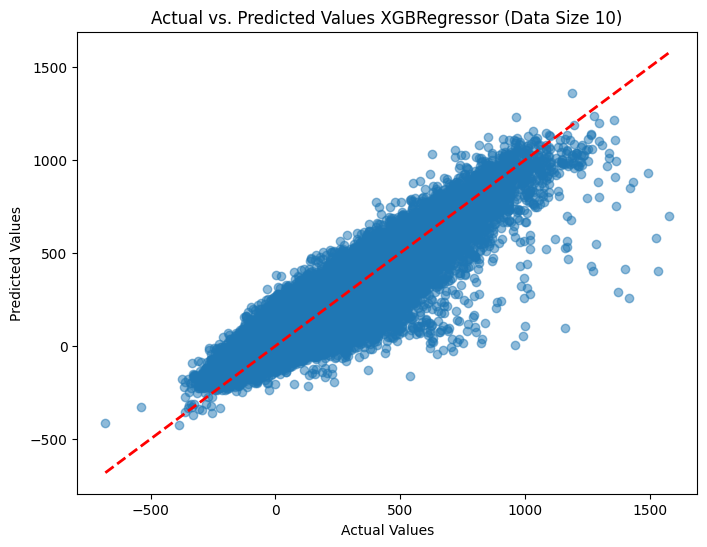

######### 10:15 ##########
Mean Absolute Error for 10/15: 100.03015882847889
Mean Squared Error for 10/15: 16847.936244129414
R-squared for 10/15: 0.6186993883634949


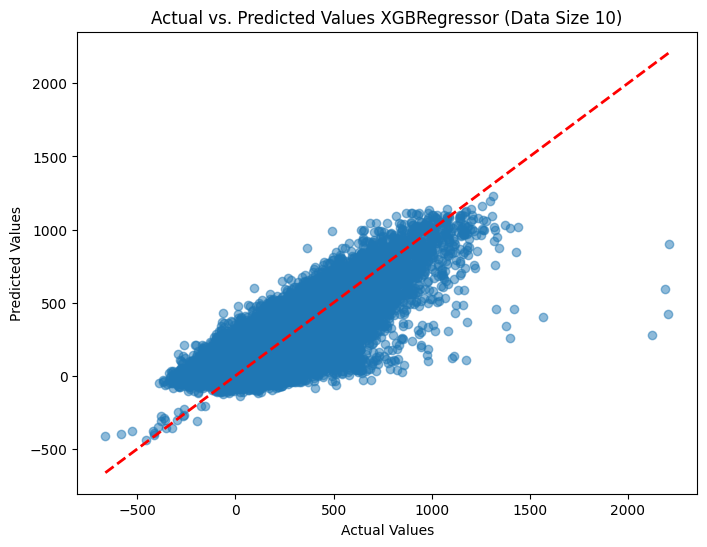

######### 10:20 ##########
Mean Absolute Error for 10/20: 113.60993283123419
Mean Squared Error for 10/20: 21962.20549612337
R-squared for 10/20: 0.5271956414094623


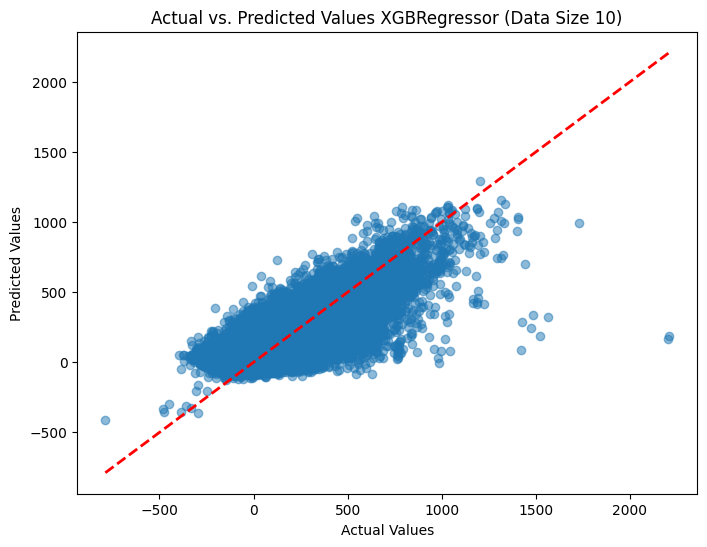

######### 15:5 ##########
Mean Absolute Error for 15/5: 78.8722608841275
Mean Squared Error for 15/5: 10139.666879343175
R-squared for 15/5: 0.7238739137048149


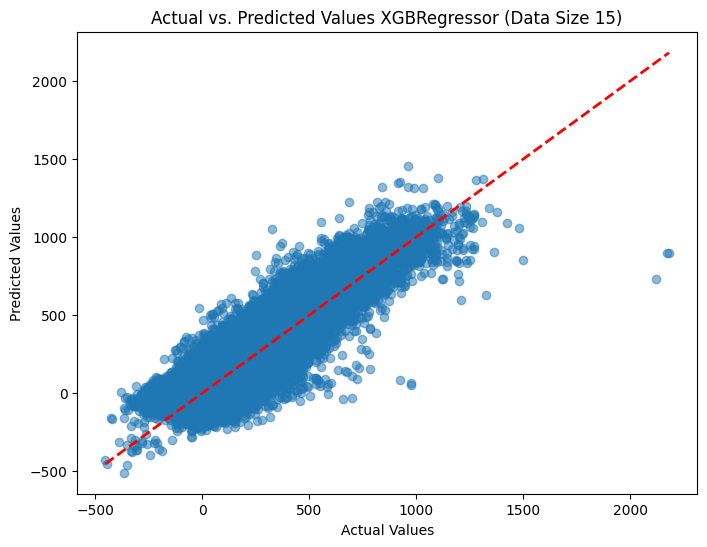

######### 15:10 ##########
Mean Absolute Error for 15/10: 92.24097211080878
Mean Squared Error for 15/10: 14163.03096542014
R-squared for 15/10: 0.6470418811497176


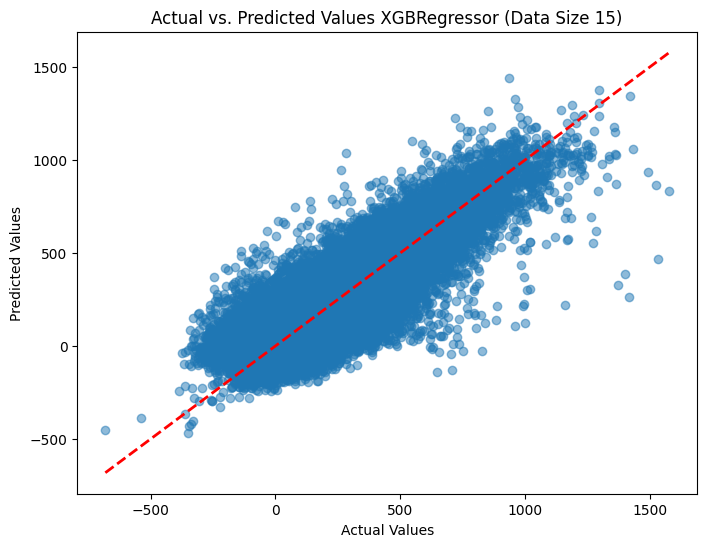

######### 15:15 ##########
Mean Absolute Error for 15/15: 88.65703756497382
Mean Squared Error for 15/15: 13550.850398779367
R-squared for 15/15: 0.6933186670236986


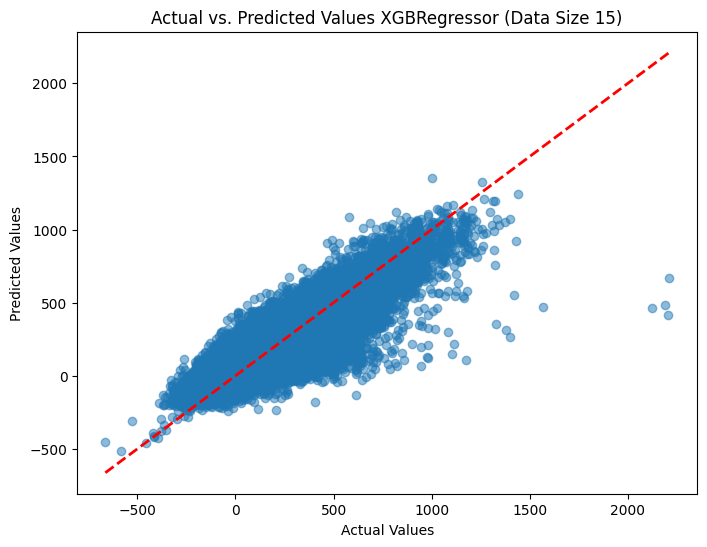

######### 15:20 ##########
Mean Absolute Error for 15/20: 114.52313408950069
Mean Squared Error for 15/20: 21117.271055673424
R-squared for 15/20: 0.5453854669367075


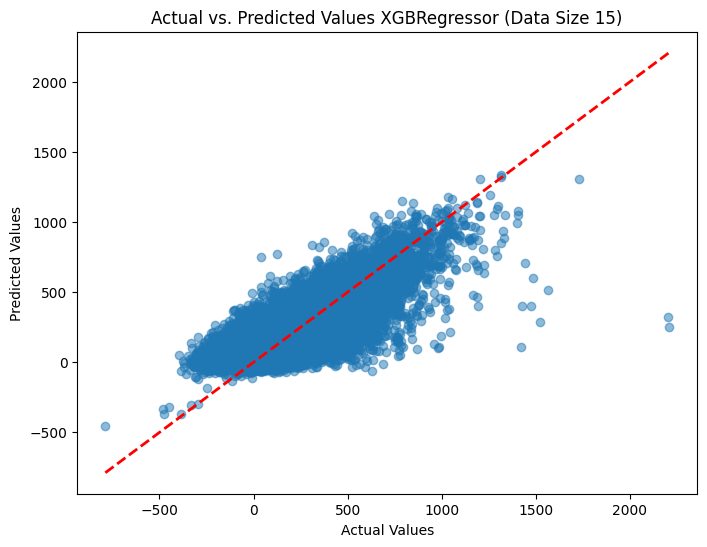

######### 20:5 ##########
Mean Absolute Error for 20/5: 80.21499071612354
Mean Squared Error for 20/5: 11144.050771045613
R-squared for 20/5: 0.6965222663130529


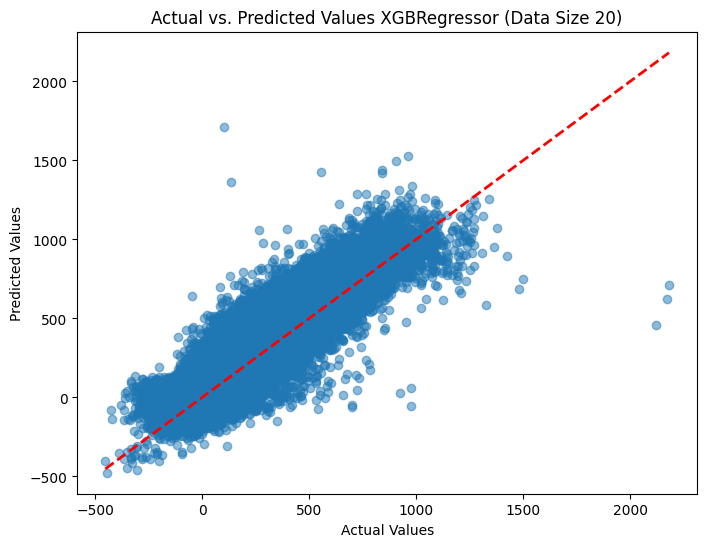

######### 20:10 ##########
Mean Absolute Error for 20/10: 95.02632256527225
Mean Squared Error for 20/10: 15738.295247327069
R-squared for 20/10: 0.6077845838246307


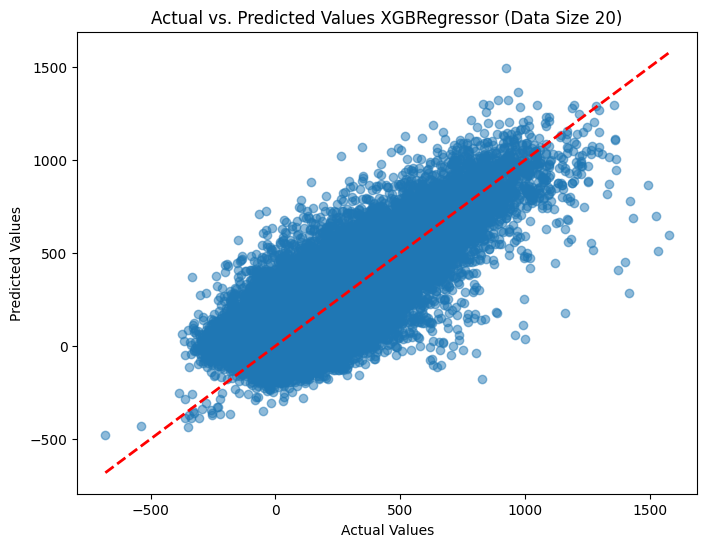

######### 20:15 ##########
Mean Absolute Error for 20/15: 102.0201690144094
Mean Squared Error for 20/15: 17721.69264158944
R-squared for 20/15: 0.5989246311501948


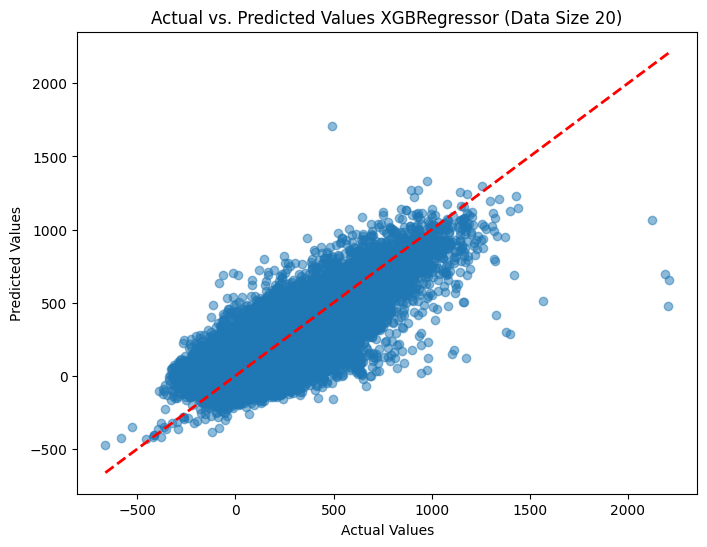

######### 20:20 ##########
Mean Absolute Error for 20/20: 103.65569433139328
Mean Squared Error for 20/20: 18280.726671404904
R-squared for 20/20: 0.6064508525808952


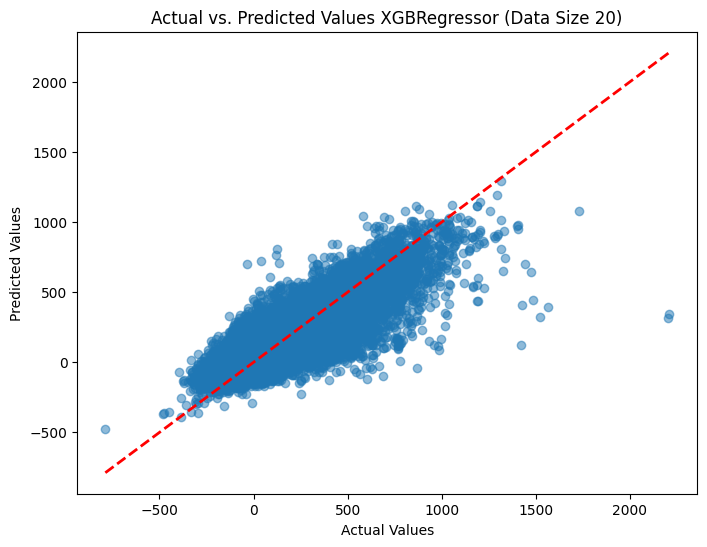

In [25]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]


    if size == 10 or size == 15:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 100
      }
    else:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 0.005
      }

    model = XGBRegressor(**params)


    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    for size_b in data_sizes:

      X_test_SAMPLE = globals()[f"X{size_b}_test_SAMPLE"]
      Y_test_SAMPLE = globals()[f"Y{size_b}_test_SAMPLE"]

      # Make predictions and evaluate the model
      y_pred = model.predict(X_test_SAMPLE)
      mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
      mse = mean_squared_error(Y_test_SAMPLE, y_pred)
      r2 = r2_score(Y_test_SAMPLE, y_pred)

      print(f"######### {size}:{size_b} ##########")

      print(f"Mean Absolute Error for {size}/{size_b}: {mae}")
      print(f"Mean Squared Error for {size}/{size_b}: {mse}")
      print(f"R-squared for {size}/{size_b}: {r2}")

      # Visualization
      plt.figure(figsize=(8, 6))
      plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
      plt.xlabel("Actual Values")
      plt.ylabel("Predicted Values")
      plt.title(f"Actual vs. Predicted Values XGBRegressor (Data Size {size})")
      plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
      plt.show()

Model Evaluation - with outliers



In [37]:
outlier5 = delayed5.copy()
outlier5["zscore"] = (outlier5.arrival_delay - outlier5.arrival_delay.mean()) / outlier5.arrival_delay.std()
outlier5 = outlier5[(outlier5.zscore < -2.5) | (outlier5.zscore > 2.5)].drop(columns=["zscore"])

outlier10 = delayed10.copy()
outlier10["zscore"] = (outlier10.arrival_delay - outlier10.arrival_delay.mean()) / outlier10.arrival_delay.std()
outlier10 = outlier10[(outlier10.zscore < -2.5) | (outlier10.zscore > 2.5)].drop(columns=["zscore"])

outlier15 = delayed15.copy()
outlier15["zscore"] = (outlier15.arrival_delay - outlier15.arrival_delay.mean()) / outlier15.arrival_delay.std()
outlier15 = outlier15[(outlier15.zscore < -2.5) | (outlier15.zscore > 2.5)].drop(columns=["zscore"])

outlier20 = delayed20.copy()
outlier20["zscore"] = (outlier20.arrival_delay - outlier20.arrival_delay.mean()) / outlier20.arrival_delay.std()
outlier20 = outlier20[(outlier20.zscore < -2.5) | (outlier20.zscore > 2.5)].drop(columns=["zscore"])

In [42]:
# For outlier5
Y5_outlier = outlier5["delayed_delay"]
X5_outlier = outlier5.drop(columns=["delayed_delay","arrival_delay"])

# For outlier10
Y10_outlier = outlier10["delayed_delay"]
X10_outlier = outlier10.drop(columns=["delayed_delay","arrival_delay"])

# For outlier15
Y15_outlier = outlier15["delayed_delay"]
X15_outlier = outlier15.drop(columns=["delayed_delay","arrival_delay"])

# For outlier20
Y20_outlier = outlier20["delayed_delay"]
X20_outlier = outlier20.drop(columns=["delayed_delay","arrival_delay"])

######### 5:5 ##########
Mean Absolute Error for 5/5: 54.75628312918592
Mean Squared Error for 5/5: 5628.753810086307
R-squared for 5/5: 0.8221099842439845


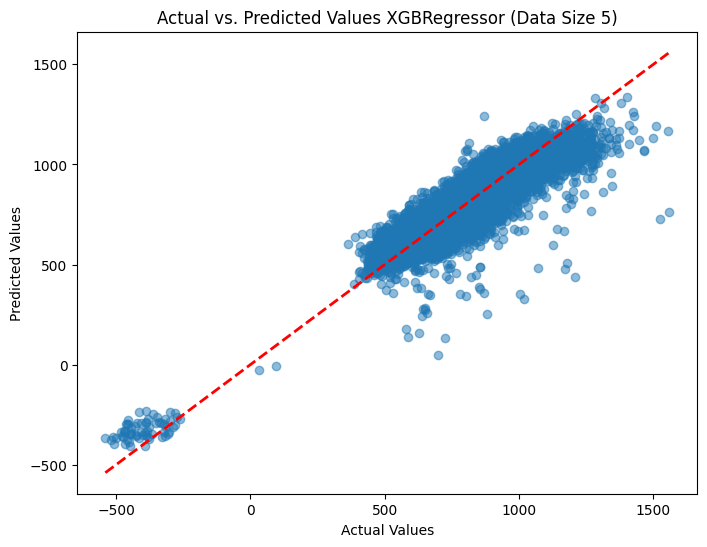

######### 5:10 ##########
Mean Absolute Error for 5/10: 99.36773070986648
Mean Squared Error for 5/10: 16478.50038907969
R-squared for 5/10: 0.5912573837662616


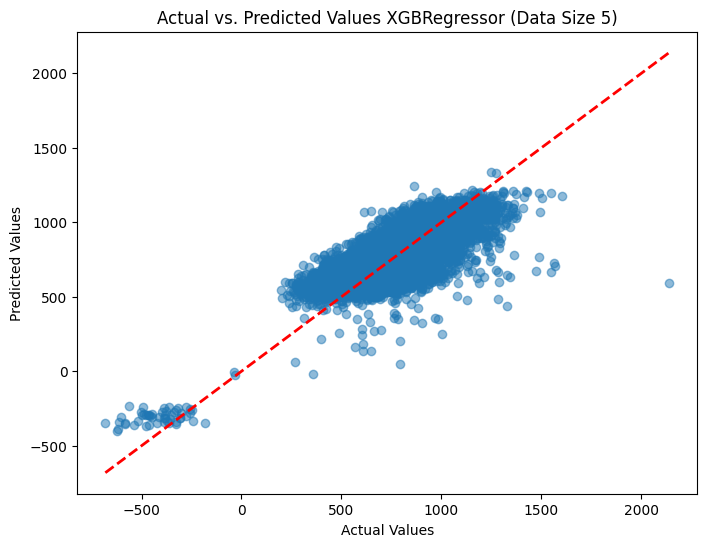

######### 5:15 ##########
Mean Absolute Error for 5/15: 127.60211777058049
Mean Squared Error for 5/15: 26882.496454231197
R-squared for 5/15: 0.44341540694269166


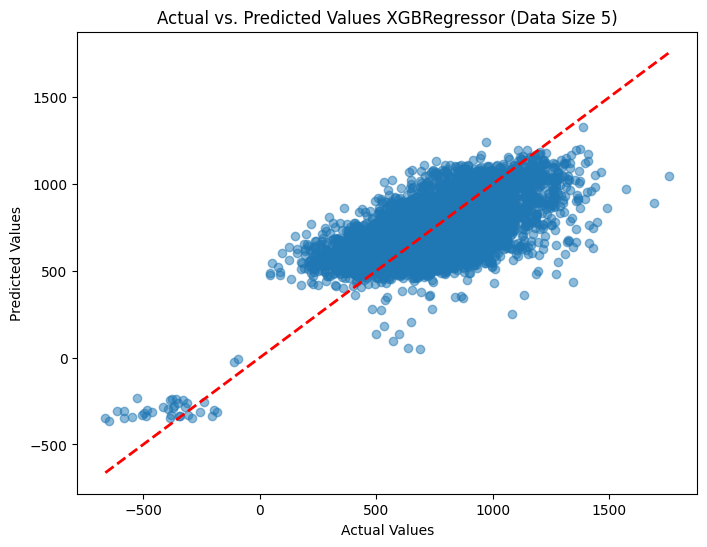

######### 5:20 ##########
Mean Absolute Error for 5/20: 148.6321024952204
Mean Squared Error for 5/20: 36684.96451724308
R-squared for 5/20: 0.3576373564883929


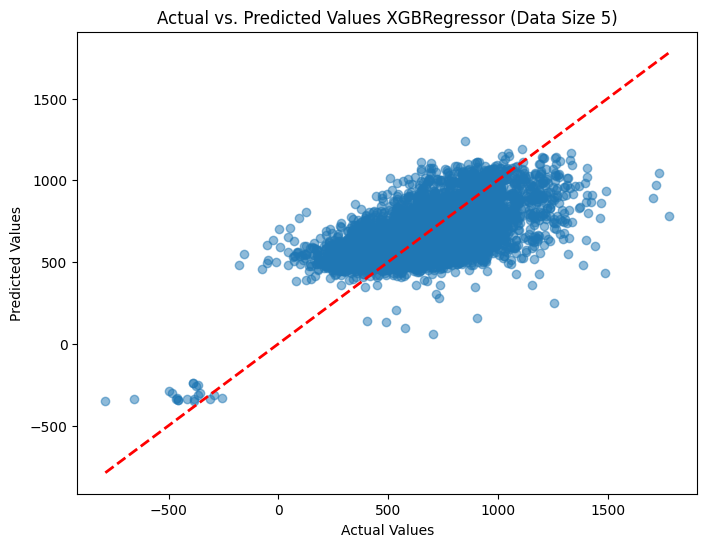

######### 10:5 ##########
Mean Absolute Error for 10/5: 83.41348879936545
Mean Squared Error for 10/5: 11303.657488792953
R-squared for 10/5: 0.6427614572201108


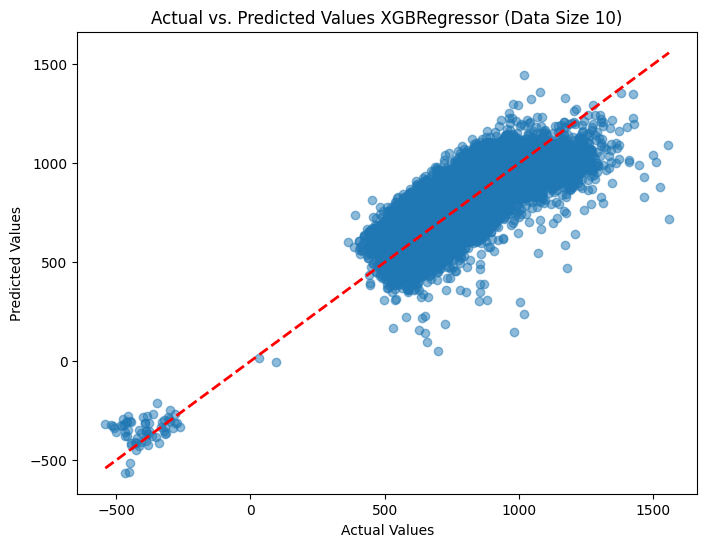

######### 10:10 ##########
Mean Absolute Error for 10/10: 83.60738938122046
Mean Squared Error for 10/10: 12139.417289172381
R-squared for 10/10: 0.6988866058699342


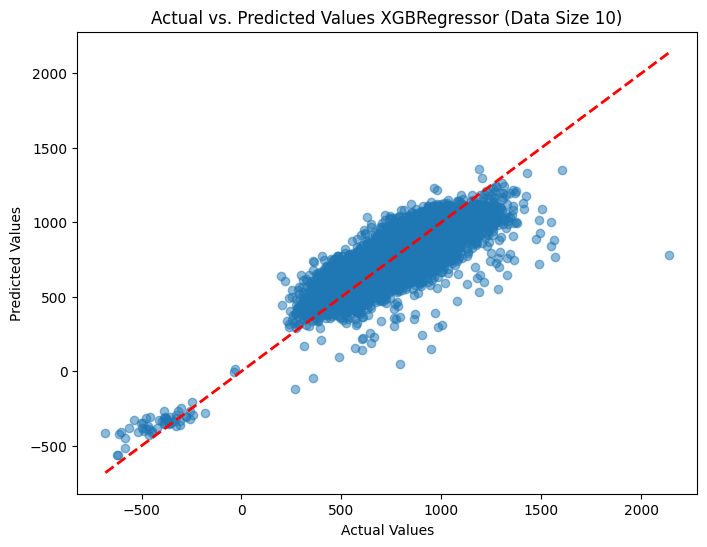

######### 10:15 ##########
Mean Absolute Error for 10/15: 121.73142810920478
Mean Squared Error for 10/15: 24102.54282535532
R-squared for 10/15: 0.5009725375417933


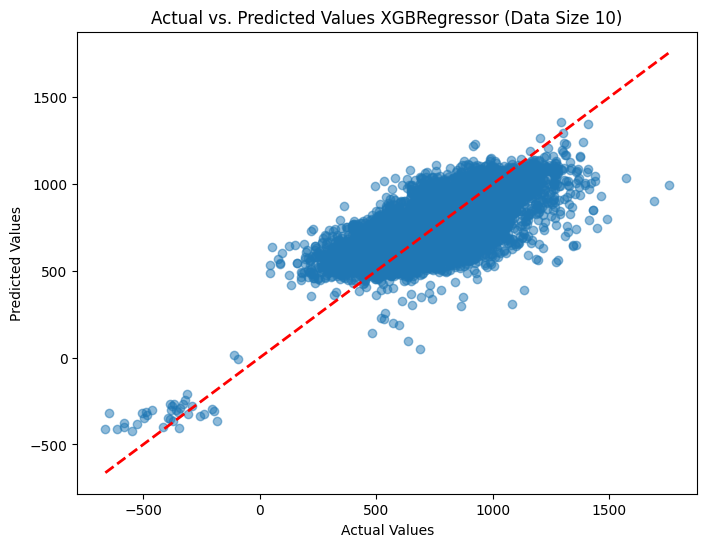

######### 10:20 ##########
Mean Absolute Error for 10/20: 144.7148922293752
Mean Squared Error for 10/20: 34468.69105889871
R-squared for 10/20: 0.39644484332070384


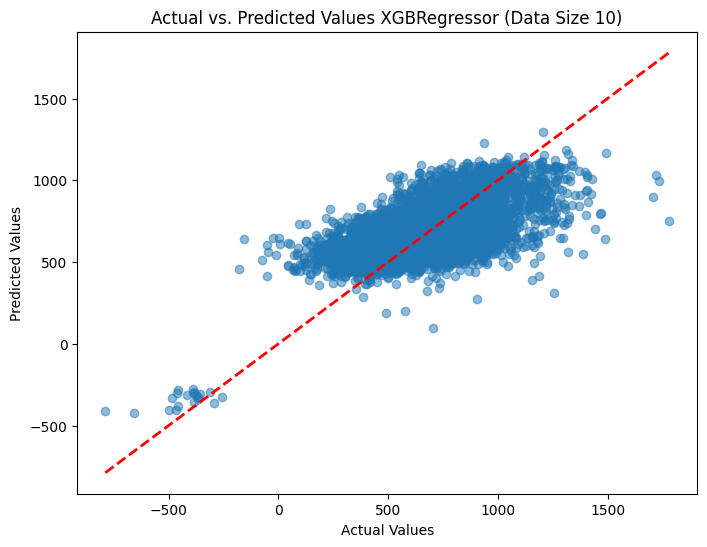

######### 15:5 ##########
Mean Absolute Error for 15/5: 104.80292400587051
Mean Squared Error for 15/5: 18277.014112305602
R-squared for 15/5: 0.4223768816136749


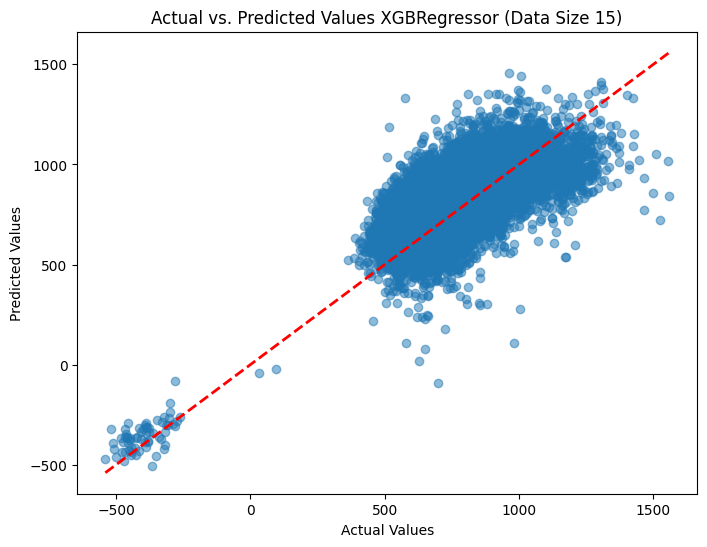

######### 15:10 ##########
Mean Absolute Error for 15/10: 114.09700881726182
Mean Squared Error for 15/10: 21247.458093477093
R-squared for 15/10: 0.47296529390502495


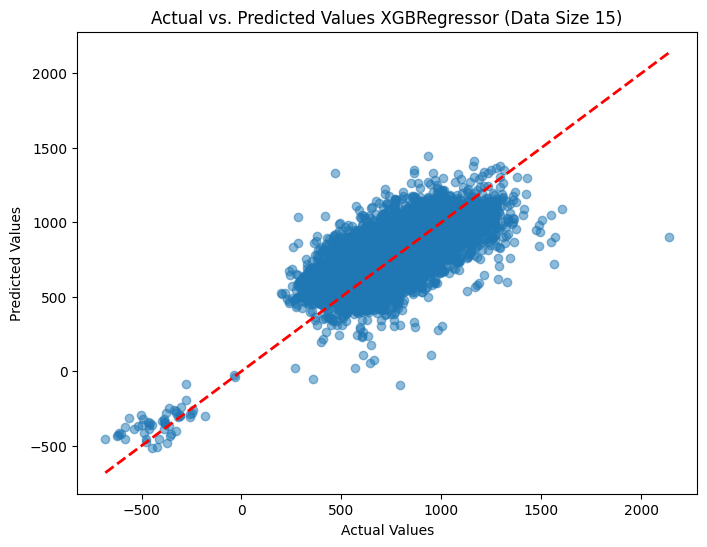

######### 15:15 ##########
Mean Absolute Error for 15/15: 106.06022929667525
Mean Squared Error for 15/15: 18467.427850427957
R-squared for 15/15: 0.6176439255764201


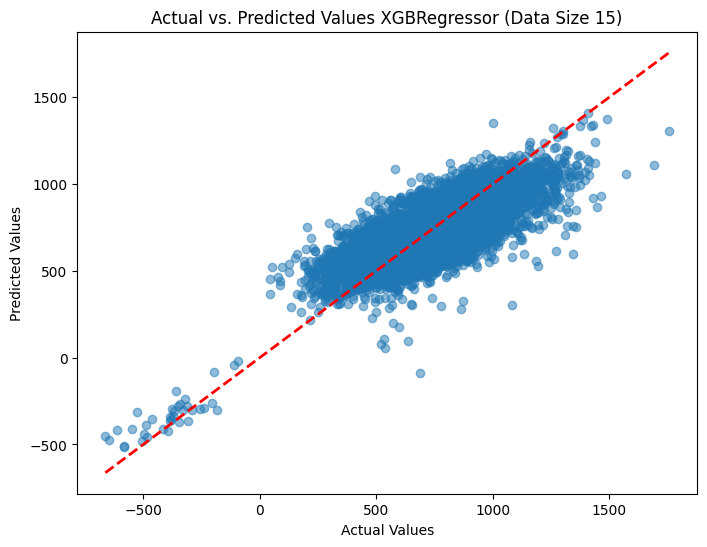

######### 15:20 ##########
Mean Absolute Error for 15/20: 139.07266827332657
Mean Squared Error for 15/20: 31115.62756282586
R-squared for 15/20: 0.45515779996503236


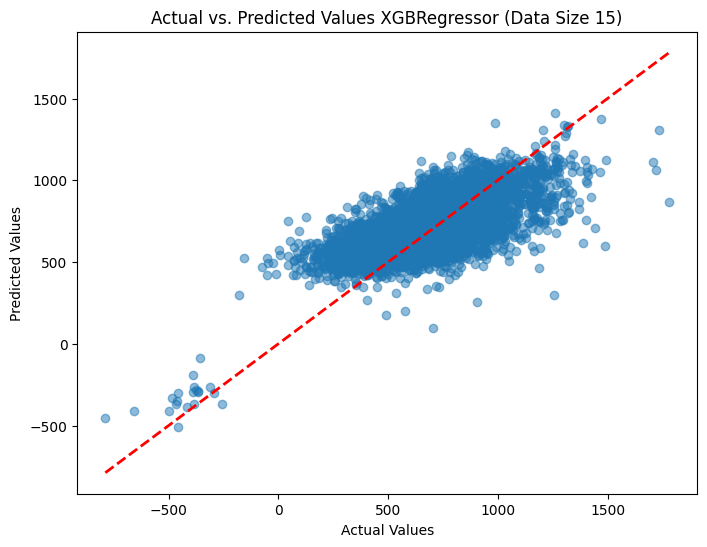

######### 20:5 ##########
Mean Absolute Error for 20/5: 124.98548544167197
Mean Squared Error for 20/5: 25629.998839866188
R-squared for 20/5: 0.18999461492160263


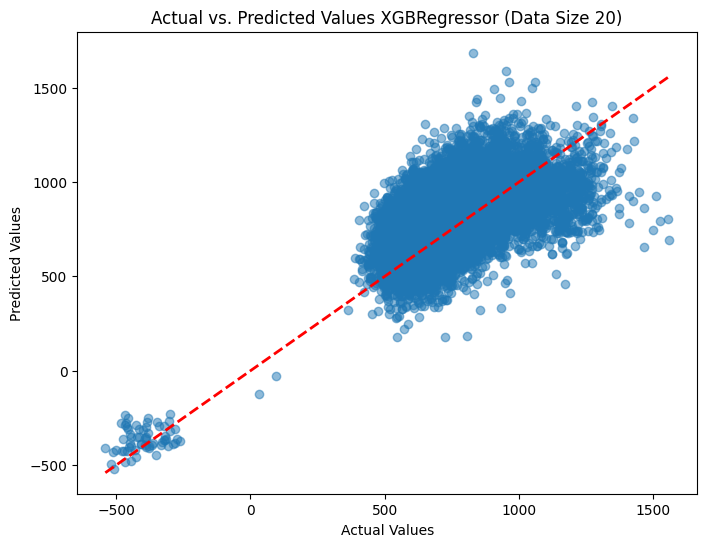

######### 20:10 ##########
Mean Absolute Error for 20/10: 128.00491156027715
Mean Squared Error for 20/10: 27101.064912583828
R-squared for 20/10: 0.32776891625218185


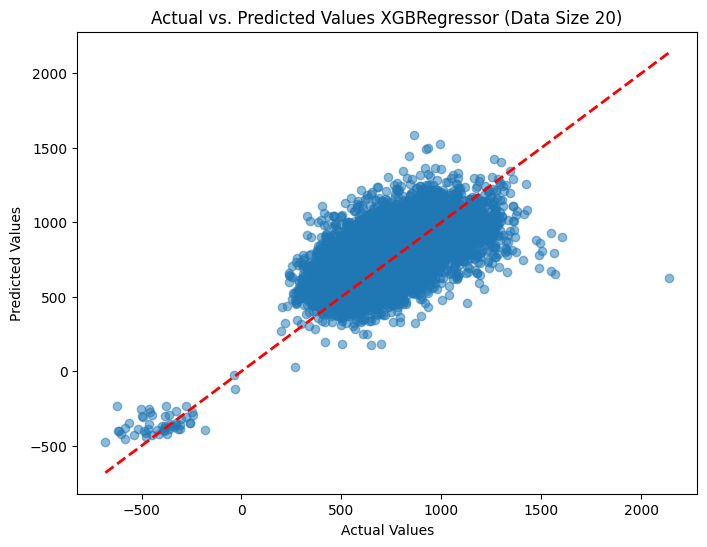

######### 20:15 ##########
Mean Absolute Error for 20/15: 126.17269327294703
Mean Squared Error for 20/15: 25693.98584637044
R-squared for 20/15: 0.4680227455560054


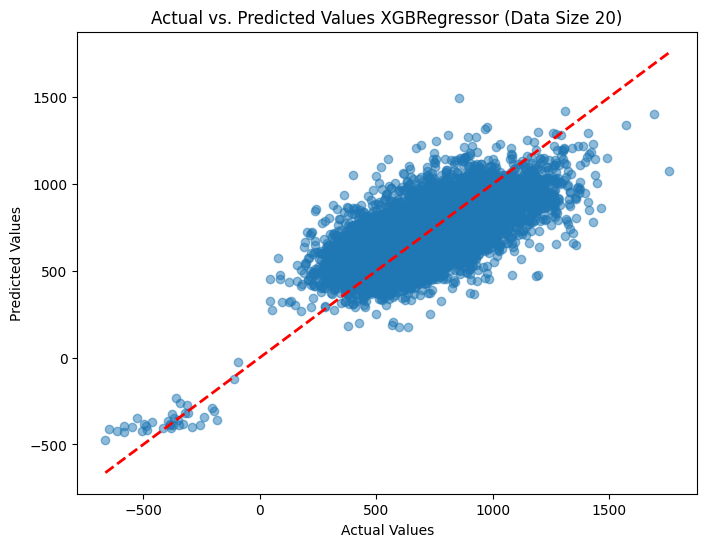

######### 20:20 ##########
Mean Absolute Error for 20/20: 121.07541267600011
Mean Squared Error for 20/20: 24266.328082932534
R-squared for 20/20: 0.5750906983065025


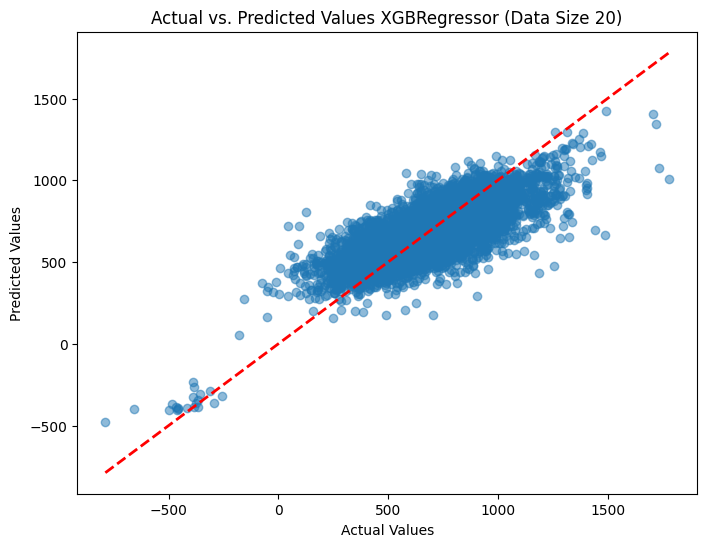

In [43]:
# Define the data sizes
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]


    if size == 10 or size == 15:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 100
      }
    else:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 0.005
      }

    model = XGBRegressor(**params)


    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)

    for size_b in data_sizes:

      X_test_SAMPLE = globals()[f"X{size_b}_outlier"]
      Y_test_SAMPLE = globals()[f"Y{size_b}_outlier"]

      # Make predictions and evaluate the model
      y_pred = model.predict(X_test_SAMPLE)
      mae = mean_absolute_error(Y_test_SAMPLE, y_pred)
      mse = mean_squared_error(Y_test_SAMPLE, y_pred)
      r2 = r2_score(Y_test_SAMPLE, y_pred)

      print(f"######### {size}:{size_b} ##########")

      print(f"Mean Absolute Error for {size}/{size_b}: {mae}")
      print(f"Mean Squared Error for {size}/{size_b}: {mse}")
      print(f"R-squared for {size}/{size_b}: {r2}")

      # Visualization
      plt.figure(figsize=(8, 6))
      plt.scatter(Y_test_SAMPLE, y_pred, alpha=0.5)  # Plot actual vs. predicted values
      plt.xlabel("Actual Values")
      plt.ylabel("Predicted Values")
      plt.title(f"Actual vs. Predicted Values XGBRegressor (Data Size {size})")
      plt.plot([min(Y_test_SAMPLE), max(Y_test_SAMPLE)], [min(Y_test_SAMPLE), max(Y_test_SAMPLE)], linestyle='--', color='red', lw=2)
      plt.show()

# 3. Saving The Models

In [20]:
data_sizes = [5, 10, 15, 20]

for size in data_sizes:
    # Create variable names based on the data size
    X_train_SAMPLE = globals()[f"X{size}_train_SAMPLE"]
    X_test_SAMPLE = globals()[f"X{size}_test_SAMPLE"]
    Y_train_SAMPLE = globals()[f"Y{size}_train_SAMPLE"]
    Y_test_SAMPLE = globals()[f"Y{size}_test_SAMPLE"]
    X_SAMPLE = globals()[f"X{size}_SAMPLE"]
    Y_SAMPLE = globals()[f"Y{size}_SAMPLE"]


    if size == 10 or size == 15:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 100
      }
    else:
      params = {
          'learning_rate': 0.2,
          'n_estimators': 400,
          'max_depth': 4,
          'gamma': 0.005
      }

    model = XGBRegressor(**params)


    # Train the best model on the training data
    model.fit(X_train_SAMPLE, Y_train_SAMPLE)
    
    model_name = f"xgboost_model_{size}.model"
    model.save_model(model_name)


C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
C:\Users\98998\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [13:52:36] WARNING: C: